In [4]:
import numpy as np
import matplotlib.pyplot as plt
from learned_ctrlr_opt.utils.experiment_utils import *
import os
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
colors = {"kf_meta_adapt": "C3",
         "no_meta": "C3",
          "no_adapt": "C3",
         "reptile": "C0",
         "lkbo": "C2",
         "nominal": "C7",
         "fpacoh": "C2",
         "teacher_student": "C4",
         "l1-adaptive": "C5"}
styles = {"no_adapt":"dotted",
         "no_meta": "dashed",
         "kf_meta_adapt": "solid",
         "lkbo": "solid",
         "nominal":"solid",
         "fpacoh": "solid",
         "reptile": "solid",
         "teacher_student": "solid",
         "l1-adaptive": "solid"}

sns.set_style("darkgrid")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TDC OOD Tasks 4

In [19]:
test_set_name = "ood_tasks_4"
robot_name = "topdowncar"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

0 kf_noadapt_woven-water-348_Dec_26_2023
1 reptile_hardy-sound-351_Dec_27_2023
2 lkbo
3 kf_sparkling-bao-414_Feb_23_2024
4 kf_nometa_woven-water-348_Dec_26_2023
5 ts_azure-glade-490_Apr_07_2024
6 nom_gain
7 kf_wobbly-dragon-415_Mar_12_2024
8 kf_woven-water-348_Dec_26_2023


OCCAM (Ours) failures: 0.13411458333333334
OCCAM (No-Adapt) failures: 0.3736979166666667
OCCAM (No-Meta) failures: 0.4596354166666667
LK-GP failures: 0.2421875
Reptile failures: 0.14192708333333334
Nominal failures: 0.08333333333333333
------
OCCAM (Ours) final mean: 0.39770229405861973
OCCAM (Ours) final std: 0.17187943084020083
------
OCCAM (No-Adapt) final mean: 0.2280345858180101
OCCAM (No-Adapt) final std: 0.16246331808353093
------
OCCAM (No-Meta) final mean: 0.10027234147321737
OCCAM (No-Meta) final std: 0.16271453383659995
------
LK-GP final mean: 0.2941644146098386
LK-GP final std: 0.13637282147338117
------
Reptile final mean: 0.2990849476855498
Reptile final std: 0.25818662866366304
------
Nominal final mean: 0.25155990554678265
Nominal final std: 3.2518837160081897e-17
OCCAM (Ours) mttf: 15.833414231627996
OCCAM (No-Adapt) mttf: 13.232988397616808
OCCAM (No-Meta) mttf: 12.127135208634316
LK-GP mttf: 8.768345787860868
Reptile mttf: 13.173103385010549
Nominal mttf: 13.6228714

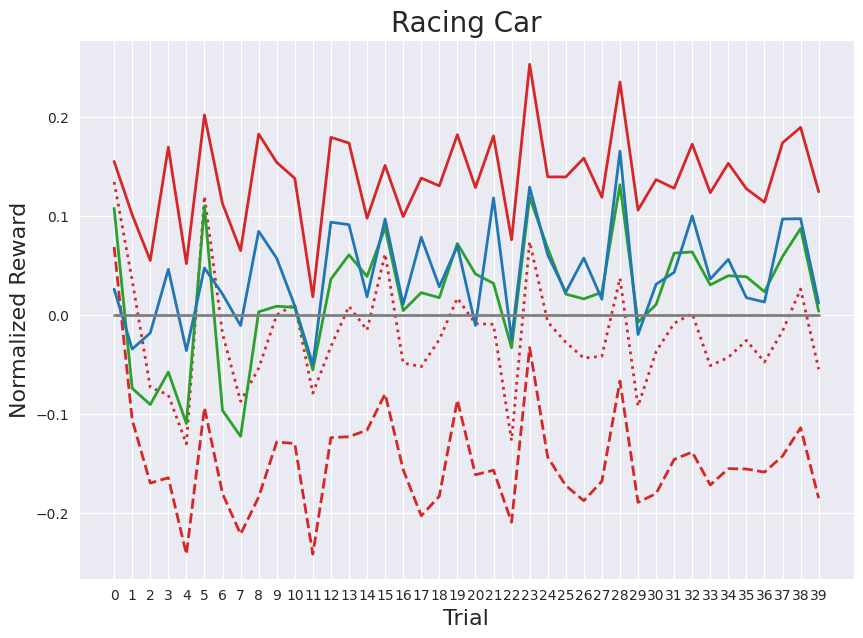

In [20]:
idxs = [8, 0, 4, 2, 1, 6]
# labels = ["kf_meta_adapt", "no_adapt", "no_meta", "lkbo", "reptile", "nominal"]
labels = ["OCCAM (Ours)", "OCCAM (No-Adapt)", "OCCAM (No-Meta)", "LK-GP", "Reptile", "Nominal"]

result_idxs = [(132,132+8),
                (100,108),
              (100,108),
              (100,108),
              (100,108),
              (100,108)]
# idxs = [8, 5, 6]
# labels = ["kf_meta_adapt", "teacher_student", "nominal"]
# result_idxs = [(132,132+8),
#               (100,105),
#               (100,108)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas
total_num = len(all_results[labels[0]]) * all_results[labels[0]][0]["actual_costs"].shape[0] * all_results[labels[0]][0]["actual_costs"].shape[1]

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Racing Car", fontsize=20)
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
keys = ["actual_costs"]

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
# nom_results = get_mean_filter_crashed_runs(all_results["nominal"], keys, 2)

nom_ac = nom_results["actual_costs"].squeeze()

for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
#     line = ax.plot(mean_actual_costs-nom_ac)
    line = sns.lineplot(mean_actual_costs-nom_ac, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_ac-var_actual_costs, 
#                 mean_actual_costs-nom_ac+var_actual_costs, color=line[0].get_c(), alpha=0.5)
    
ax.set_xticks([i for i in range(len(mean_actual_costs))])
# ax.legend(labels)
# fig.tight_layout()
# plt.savefig("paper_figures/racing_car")

for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    print("------")
    print(f"{label} final mean: {np.mean(mean_actual_costs[-5:])}")
    print(f"{label} final std: {np.mean(var_actual_costs[-5:])}")

for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    print(f"{label} mttf: {mttf}")


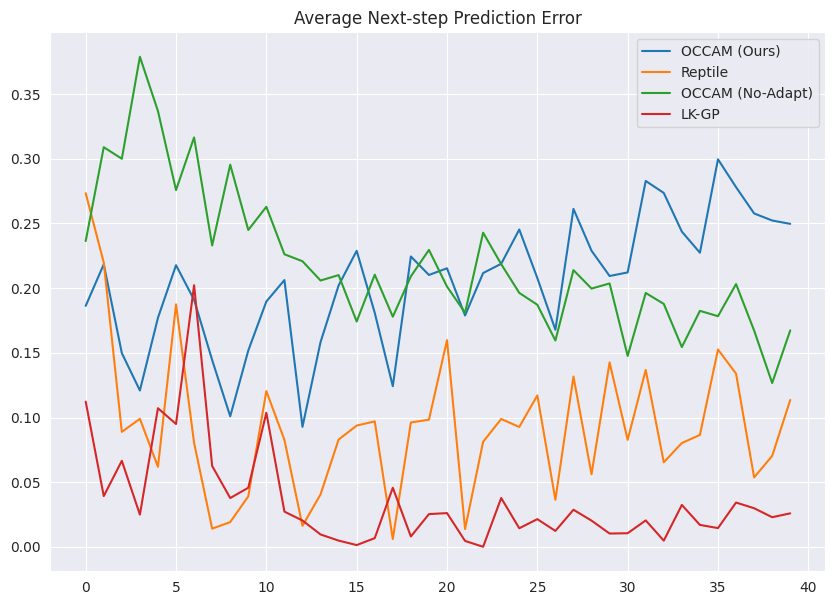

In [24]:
keys = ["expected_costs", "actual_costs"]
# keys = ["actual_costs", "expected_Costs", "actual_scaled_metrics"]
# labels_exp = ["reptile", "kf_meta_adapt", "no_adapt", "no_meta", "teacher_student"]
labels_exp = ["OCCAM (Ours)", "Reptile", "OCCAM (No-Adapt)", "LK-GP"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Next-step Prediction Error")

for label in labels_exp:
#     mean_results = get_mean_filter_all_fails(all_results[label], keys, 2)
    mean_results, var_results, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    mean_exp_costs = mean_results["expected_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    line = ax.plot(np.abs(mean_actual_costs - mean_exp_costs))

#     mean_expected_scaled_metrics = mean_results["expected_scaled_metrics"].squeeze()[...,2]
#     mean_actual_scaled_metrics = mean_results["actual_scaled_metrics"].squeeze()[...,2]
#     line = ax.plot(np.abs(mean_expected_scaled_metrics - mean_actual_scaled_metrics))

ax.legend(labels_exp)

In [ ]:
track = 2
param = 10
seed = 5
plt.plot(all_results["kf_meta_adapt"][seed]["actual_costs"][track,param,:])
plt.plot(all_results["nominal"][seed]["actual_costs"][track,param,:])

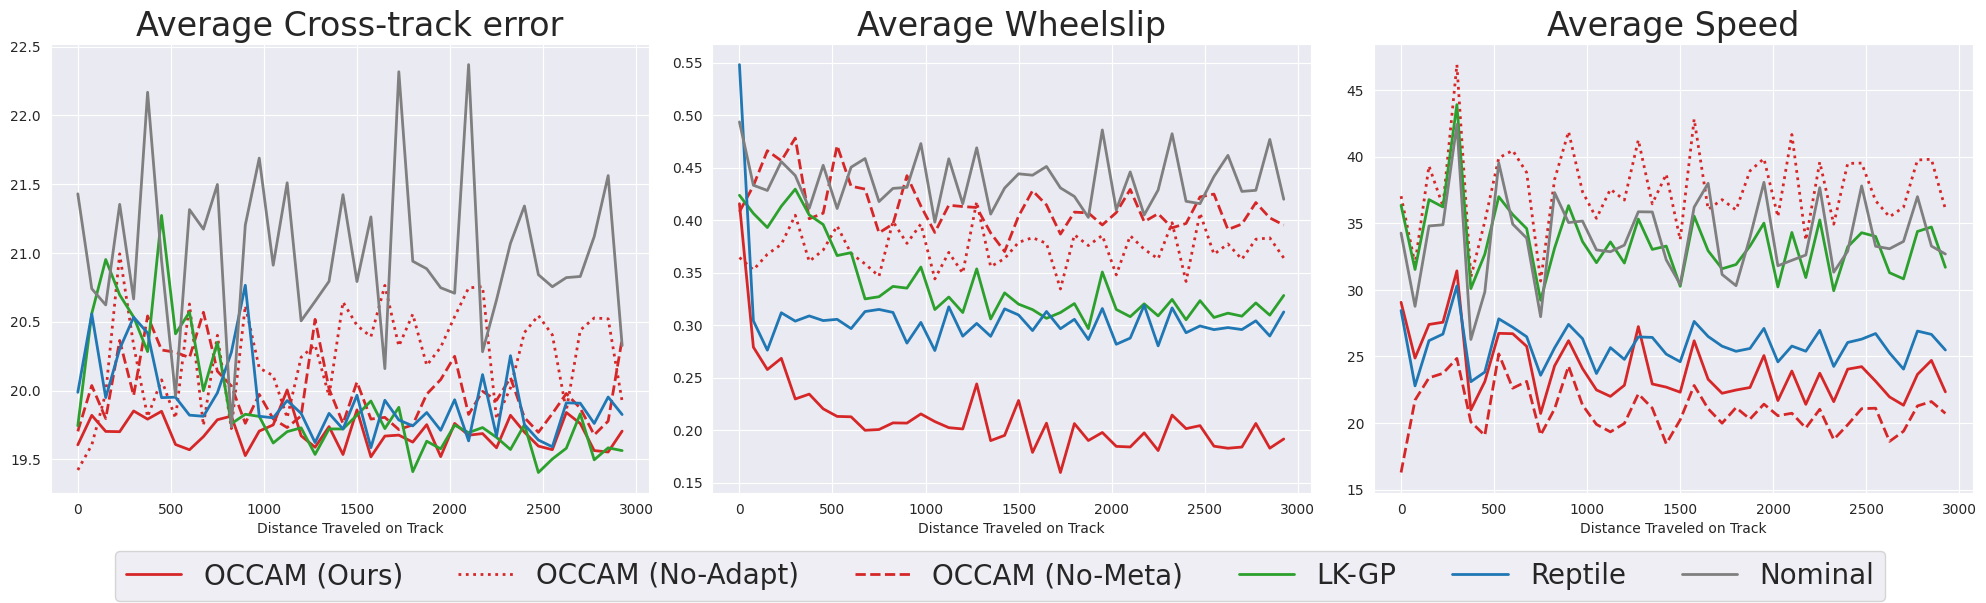

In [15]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
titles = ["Average Cross-track error", "Average Wheelslip", "Average Speed"]
for label in labels:
    metrics = uninvert_raw_metrics(all_results[label], "raw_metrics", [0, 1], 2)
    mean = get_mean_filter_crashed_runs([metrics], "raw_metrics", 3)["raw_metrics"]
    for i in range(3):
        ax[i].plot([i*75 for i in range(40)], mean[:,i], c=colors[label], linewidth=2, linestyle=styles[label], label=label)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Distance Traveled on Track")

for i in range(3):
    ax[i].set_title(titles[i], fontsize=24)
# ax[0].legend(labels)
# ax[0].set_ylabel("Tracking Error (m)", fontsize=16)

fig.tight_layout()
fig.subplots_adjust(bottom=0.17)
lines_labels = [ax[0].get_legend_handles_labels()]
lines, lbls = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, lbls, ncol=6, loc="lower center", fontsize=20, bbox_to_anchor=(0.5, -0.02))
plt.savefig("paper_figures/tdc_ood_4_metrics.png")

# CF OOD Params 1

In [5]:
test_set_name = "ood_params_1"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)
    
    
colors = {"OCCAM (No-Adapt)": "C3",
         "OCCAM (No-Meta)": "C3",
          "OCCAM (Ours)": "C3",
         "Reptile": "C0",
         "LK-GP": "C2",
         "Nominal": "C7",
         "F-PACOH": "C2",
         "L1-Adaptive":"Black",
         "Teacher-Student": "Brown"}
styles = {"OCCAM (No-Adapt)":"dotted",
         "OCCAM (No-Meta)": "dashed",
         "OCCAM (Ours)": "solid",
         "LK-GP": "solid",
         "Nominal":"solid",
         "F-PACOH": "solid",
         "Reptile": "solid",
         "L1-Adaptive": "solid",
         "Teacher-Student": "solid"}


0 kf_noadapt_sparkling-sponge-354_Dec_27_2023
1 nom_gain_adaptive
2 ts_playful-music-498_Apr_08_2024
3 kf_nometa_crazyflie_geom_history_lstsq_net
4 lkbo
5 kf_nometa_sparkling-sponge-354_Dec_27_2023
6 kf_sparkling-sponge-354_Dec_27_2023
7 nom_gain_sparkling-sponge-354_Dec_27_2023
8 nom_gain
9 reptile_devout-puddle-384_Jan_06_2024
10 kf_nometa_swift-water-374_Jan_03_2024
11 kf_swift-water-374_Jan_03_2024
12 kf_zesty-brook-355_Dec_27_2023
13 kf_cheerful-wonton-413_Feb_12_2024


In [6]:
# idxs = [4, 0, 3, 2, 7, 6]
# labels = ["Ours", "Ours (No-Adapt)", "Ours (No-Meta)", "LK-GP", "Reptile", "Nominal"]
# idxs = [5, 0, 4, 3, 8, 7, 2]
idxs = [6, 0, 5, 4, 9, 8] # 1, 2]
labels = ["OCCAM (Ours)", "OCCAM (No-Adapt)", "OCCAM (No-Meta)", "LK-GP", "Reptile", "Nominal"] #, "L1-Adaptive", "Teacher-Student"]
# idxs = [6, 8, 1]
# labels = ["kf_meta_adapt", "nominal", "teacher_student"]

result_idxs = [(108,108+8),
                (108,108+8),
#                (3000, 3005),
               (108,108+8),
               (108, 108+8),
              (108,108+8),
              (100,100+8),
              (2005,2005+5),
              (200,208)]
# result_idxs = [(108, 108+8),
#               (100,100+8),
#               (100,100+8)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

for label in labels:
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

# reptile_gain_changes = []
# kf_gain_changes = []
# for j in range(8):
#     tmp_rep = []
#     tmp_kf = []
#     for trial in range(1,30):
#         tmp_rep.append(np.mean(np.abs(all_results["reptile"][j]["tried_gains"][:,:,trial,:] - all_results["reptile"][j]["tried_gains"][:,:,trial-1,:])))
#         tmp_kf.append(np.mean(np.abs(all_results["kf_meta_adapt"][j]["tried_gains"][:,:,trial,:] - all_results["kf_meta_adapt"][j]["tried_gains"][:,:,trial-1,:])))
#     reptile_gain_changes.append(tmp_rep)
#     kf_gain_changes.append(tmp_kf)
    
# plt.plot(np.mean(reptile_gain_changes, axis=0))
# plt.plot(np.mean(kf_gain_changes, axis=0))

OCCAM (Ours) failures: 0.2630208333333333
OCCAM (No-Adapt) failures: 0.2734375
OCCAM (No-Meta) failures: 0.328125
LK-GP failures: 0.2994791666666667
Reptile failures: 0.3385416666666667
Nominal failures: 0.3385416666666667


------
OCCAM (Ours) final mean: 1.4007310802647326
OCCAM (Ours) final std: 0.3042692649691256
OCCAM (Ours) mttf: 6.771606771606772
------
OCCAM (No-Adapt) final mean: 1.0899968258056252
OCCAM (No-Adapt) final std: 0.3463822000291459
OCCAM (No-Adapt) mttf: 7.5040472335968
------
OCCAM (No-Meta) final mean: 1.0876034651569415
OCCAM (No-Meta) final std: 0.4017419011346985
OCCAM (No-Meta) mttf: 7.658122371240378
------
LK-GP final mean: 1.1194103364122123
LK-GP final std: 0.39244709059510746
LK-GP mttf: 8.034083992696287
------
Reptile final mean: 1.2223174960429195
Reptile final std: 0.3446622763423969
Reptile mttf: 6.545650334589648
------
Nominal final mean: 0.7271852953687428
Nominal final std: 0.24423526214905494
Nominal mttf: 8.122452119067765


Text(0.5, 1.0, 'Quadrotor')

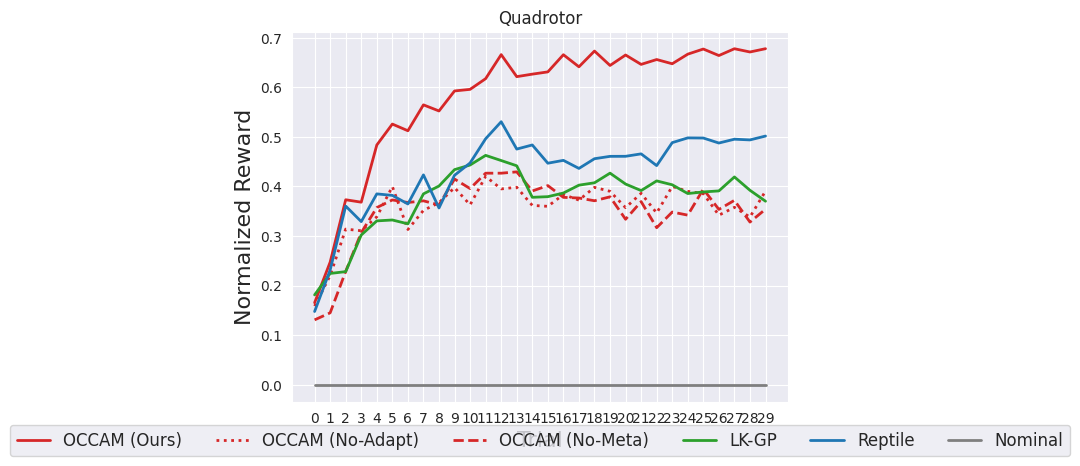

In [7]:
# robot_supax[1].set_title("Quadrotor", fontsize=20)
fig, ax = plt.subplots()

keys = ["actual_costs"]
nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
# nom_results = get_mean_filter_crashed_runs(all_results["nominal"], keys, 2)
nom_actual_costs = nom_results["actual_costs"].squeeze()

for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
    line = sns.lineplot(mean_actual_costs-nom_actual_costs, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_actual_costs-var_actual_costs, 
#                 mean_actual_costs-nom_actual_costs+var_actual_costs, color=line[0].get_c(), alpha=0.5)
ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels, fontsize=12, loc="lower center", ncol=6, bbox_to_anchor=(0.5, -0.17))
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    tmp1, tmp2, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    print("------")
    print(f"{label} final mean: {np.mean(mean_actual_costs[-5:])}")
    print(f"{label} final std: {np.mean(var_actual_costs[-5:])}")
    print(f"{label} mttf: {mttf}")
ax.set_title("Quadrotor")

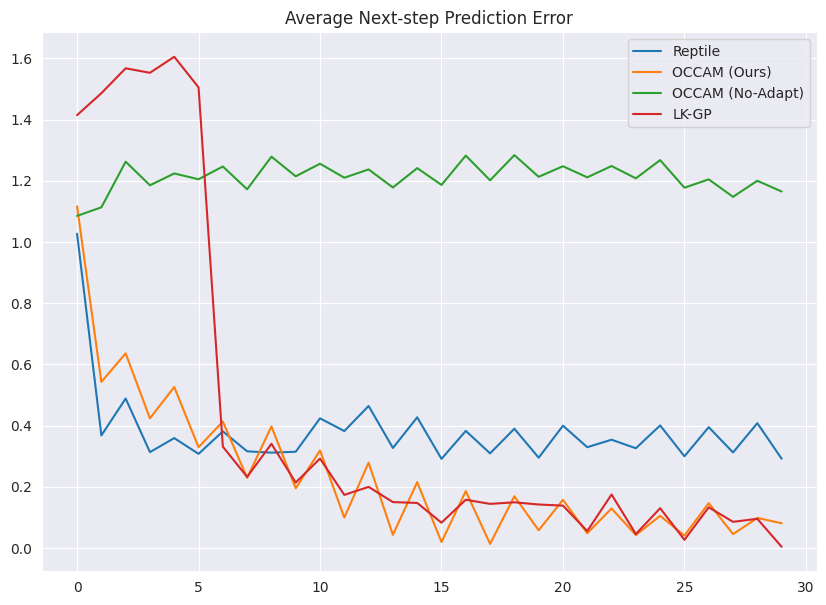

In [9]:
keys = ["expected_costs", "actual_costs"]
# labels_exp = ["reptile", "kf_meta_adapt", "no_adapt", "no_meta", "lkbo", "teacher_student"]
labels_exp = ["Reptile", "OCCAM (Ours)", "OCCAM (No-Adapt)", "LK-GP"]  # , "Teacher-Student"]
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Next-step Prediction Error")

keys = ["actual_costs", "expected_costs"]
for label in labels_exp:
#     mean_results, var_results, mttf = get_mean_std_filter__fails(all_results[label], keys, 2)
    mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    mean_exp_costs = mean_results["expected_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()    
    line = ax.plot(np.abs(mean_actual_costs - mean_exp_costs))

ax.legend(labels_exp)

OCCAM (Ours) [0.90738262 0.02419438 1.37616889 0.38125233]
OCCAM (No-Adapt) [1.19323406 0.02609376 1.41616458 0.45066168]
OCCAM (No-Meta) [1.12851532 0.02633723 1.3908532  0.45972743]
LK-GP [1.17994857 0.02880242 1.41135035 0.45351027]
Reptile [0.94257106 0.02156647 1.34323703 0.33594481]
Nominal [1.7058328  0.02770815 1.44137128 0.32437813]
L1-Adaptive [1.97817989 0.02808507 1.44962501 0.45330563]


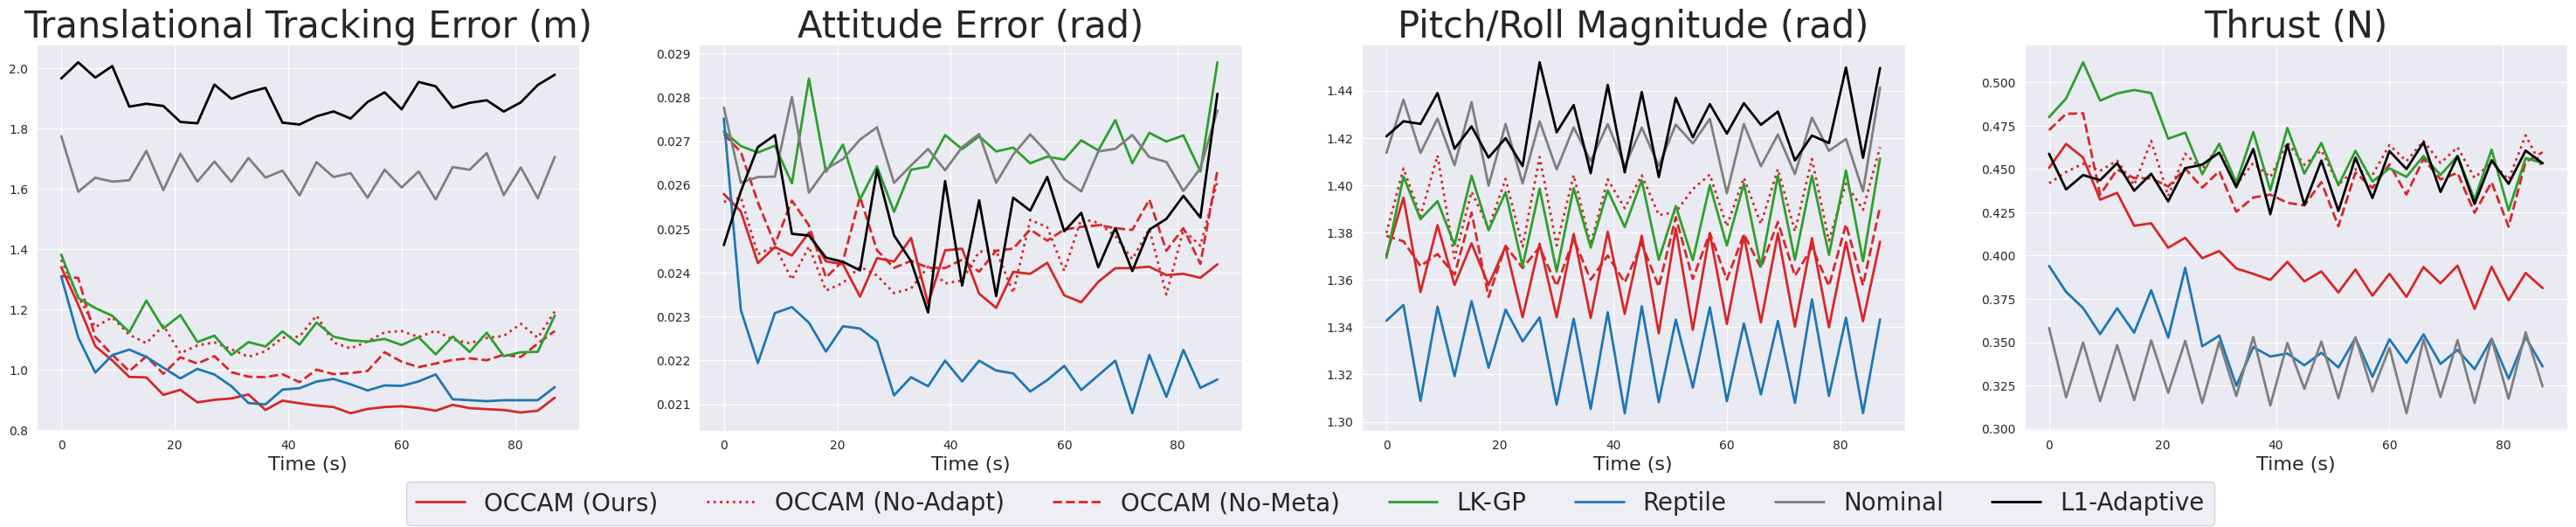

In [24]:

fig, ax = plt.subplots(1, 4, figsize=(30,6))
perf_metric_names = ["Translational Tracking Error (m)", "Attitude Error (rad)", "Pitch/Roll Magnitude (rad)", "Thrust (N)"]
for label in labels:
    metrics = uninvert_raw_metrics(all_results[label], "raw_metrics", [0, 1, 2, 3], 2)
    mean = get_mean_filter_crashed_runs([metrics], "raw_metrics", 3)["raw_metrics"]
    print(label, mean[-1])
    for i in range(4):
        ax[i].plot([i*3 for i in range(30)], mean[:,i], c=colors[label], linewidth=2, linestyle=styles[label], label=label)

for i in range(4):
    ax[i].set_title(perf_metric_names[i], fontsize=30)
    ax[i].set_xlabel("Time (s)", fontsize=16)

# ax[0].legend(labels)
# ax[0].set_ylabel("Tracking Error (m)", fontsize=16)

fig.tight_layout()
fig.subplots_adjust(bottom=0.17)
lines_labels = [ax[0].get_legend_handles_labels()]
lines, lbls = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, lbls, ncol=7, loc="lower center", fontsize=20, bbox_to_anchor=(0.5, -0.02))
plt.savefig("paper_figures/quadrotor_ood_1_metrics.png")

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
params_array, tasks, robot_kwargs = load_test_set("crazyflie", "ood_params_1")
# masses = (params_array[:,0]+1)/4
p = params_array[:,0]


all_weights = []
for i in range(8):
    all_weights.append(all_results["Ours"][i]["all_weights"][0,...])
all_weights = np.array(all_weights)

weights_flattened = np.reshape(all_weights, (-1, 15))
dot_colors = np.zeros([*all_weights.shape[:-1]])
for j in range(masses.shape[0]):
    dot_colors[...,j,:] = p[j]
    
dot_colors = dot_colors.flatten()
fig, ax = plt.subplots(figsize=(10,7))
tsne = TSNE(n_components=2)
weights_trans = tsne.fit_transform(weights_flattened)
sns.scatterplot(x=weights_trans[:,0], y=weights_trans[:,1], hue=dot_colors, hue_norm=(min(p), max(p)), ax=ax)
ax.set_title("T-SNE Projection of Obtained Weights for each Quadrotor, colored by Mass")

In [ ]:
traj = 0
param = 3
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(all_results["kf_meta_adapt"][0]["full_traj"][traj,param,:,0], all_results["kf_meta_adapt"][0]["full_traj"][traj,param,:,1], c=colors["kf_meta_adapt"])
ax[1].plot(all_results["nominal"][0]["full_traj"][traj,param,:,0], all_results["nominal"][0]["full_traj"][traj,param,:,1], c=colors["nominal"])
ax[2].plot(all_results["teacher_student"][0]["full_traj"][traj,param,:,0], all_results["teacher_student"][0]["full_traj"][traj,param,:,1], c=colors["teacher_student"])

# ax[2].plot(all_results["l1-adaptive"][0]["full_traj"][traj,param,:,0], all_results["l1-adaptive"][0]["full_traj"][traj,param,:,1], c=colors["l1-adaptive"])
for a in ax:
    a.set_xlim(-4, 4)
    a.set_ylim(-4, 4)

In [ ]:
t_idx = 0
p_idx = 2
print(all_results["kf_meta_adapt"][0]["tried_gains"][t_idx,p_idx,0])
print(all_results["teacher_student"][0]["tried_gains"][t_idx,p_idx,0])

# Mob Loco OOD Params 3

In [25]:
test_set_name = "ood_params_3"
robot_name = "mob_loco"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

0 ts_chocolate-wood-500_Apr_11_2024
1 reptile_drawn-dew-410_Jan_25_2024
2 kf_nometa_lemon-dragon-409_Jan_25_2024
3 lkbo
4 kf_noadapt_lemon-dragon-409_Jan_25_2024
5 ts_rich-shadow-516_Apr_14_2024
6 nom_gain
7 kf_lemon-dragon-409_Jan_25_2024


OCCAM (Ours) failures: 61.0
OCCAM (Ours) failures: 0.06354166666666666
OCCAM (No-Adapt) failures: 65.0
OCCAM (No-Adapt) failures: 0.06770833333333333
OCCAM (No-Meta) failures: 78.0
OCCAM (No-Meta) failures: 0.08125
LK-GP failures: 64.0
LK-GP failures: 0.06666666666666667
Reptile failures: 78.0
Reptile failures: 0.08125
Nominal failures: 85.0
Nominal failures: 0.08854166666666667


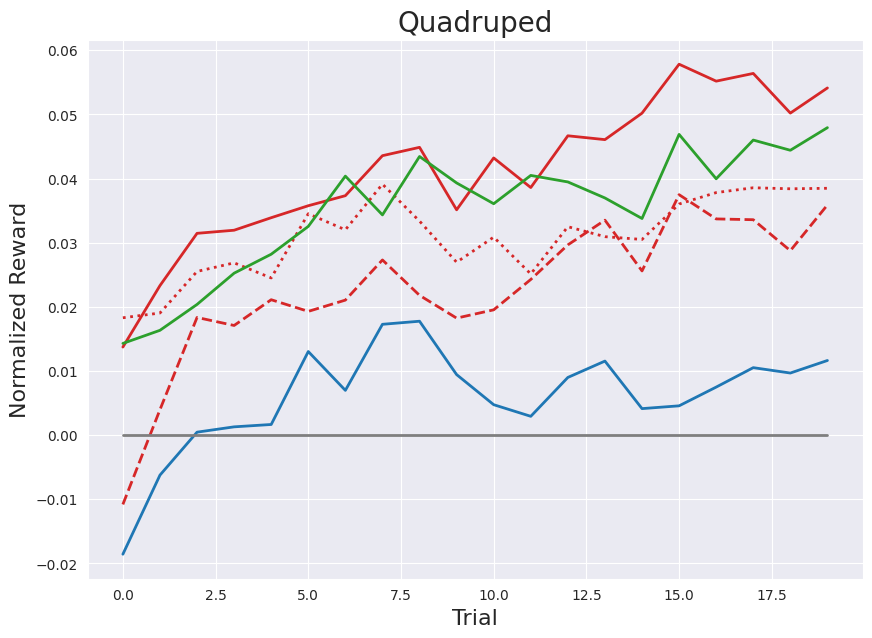

In [27]:
# idxs = [5, 3, 1, 2, 0, 4]
# labels = ["kf_meta_adapt", "no_adapt", "no_meta", "lkbo", "reptile", "nominal", "teacher_student"]
labels = ["OCCAM (Ours)", "OCCAM (No-Adapt)", "OCCAM (No-Meta)", "LK-GP", "Reptile", "Nominal"]
idxs = [7, 4, 2, 3, 1, 6]
result_idxs = [(8,16),
                (8,16),
               (8,16),
              (0,8),
              (0,8),
               (0,8),
              (0,8),
              (0,8)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas
total_num = len(all_results[labels[0]]) * all_results[labels[0]][0]["actual_costs"].shape[0] * all_results[labels[0]][0]["actual_costs"].shape[1]

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']}")
    print(f"{label} failures: {failed['failed_count']/total_num}")


fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Quadruped", fontsize=20)
ax.set_xlabel("Trial", fontsize=16)
ax.set_ylabel("Normalized Reward", fontsize=16)

keys = ["actual_costs", "expected_costs"]
nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()

keys = ["actual_costs", "expected_costs"]
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
    
#     print(f"{label} mttf: {mttf}")
    line = sns.lineplot(mean_actual_costs-nom_ac, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-var_actual_costs, 
#                 mean_actual_costs+var_actual_costs, color=line[0].get_c(), alpha=0.1)
# robot_supax[2].set_xticks([i for i in range(len(mean_actual_costs))])
# ax.legend(labels)
# fig.tight_layout()6
# plt.savefig("paper_figures/quadruped.png")

OCCAM (Ours) [1.58954830e-02 6.07427284e-03 5.37490698e-02 1.68227473e+01]
OCCAM (No-Adapt) [1.77132225e-02 6.27122860e-03 5.47870606e-02 1.73716976e+01]
OCCAM (No-Meta) [2.90333244e-02 6.32002534e-03 5.29602757e-02 1.64119333e+01]
LK-GP [1.69797905e-02 6.13287723e-03 4.66656788e-02 1.72305350e+01]
Reptile [2.73227862e-02 5.36042834e-03 4.85908775e-02 1.90601829e+01]
Nominal [1.94681041e-02 7.10115346e-03 7.89949240e-02 1.69926304e+01]
Teacher-Student [1.87669995e-02 7.46252004e-03 5.44350054e-02 1.63369560e+01]


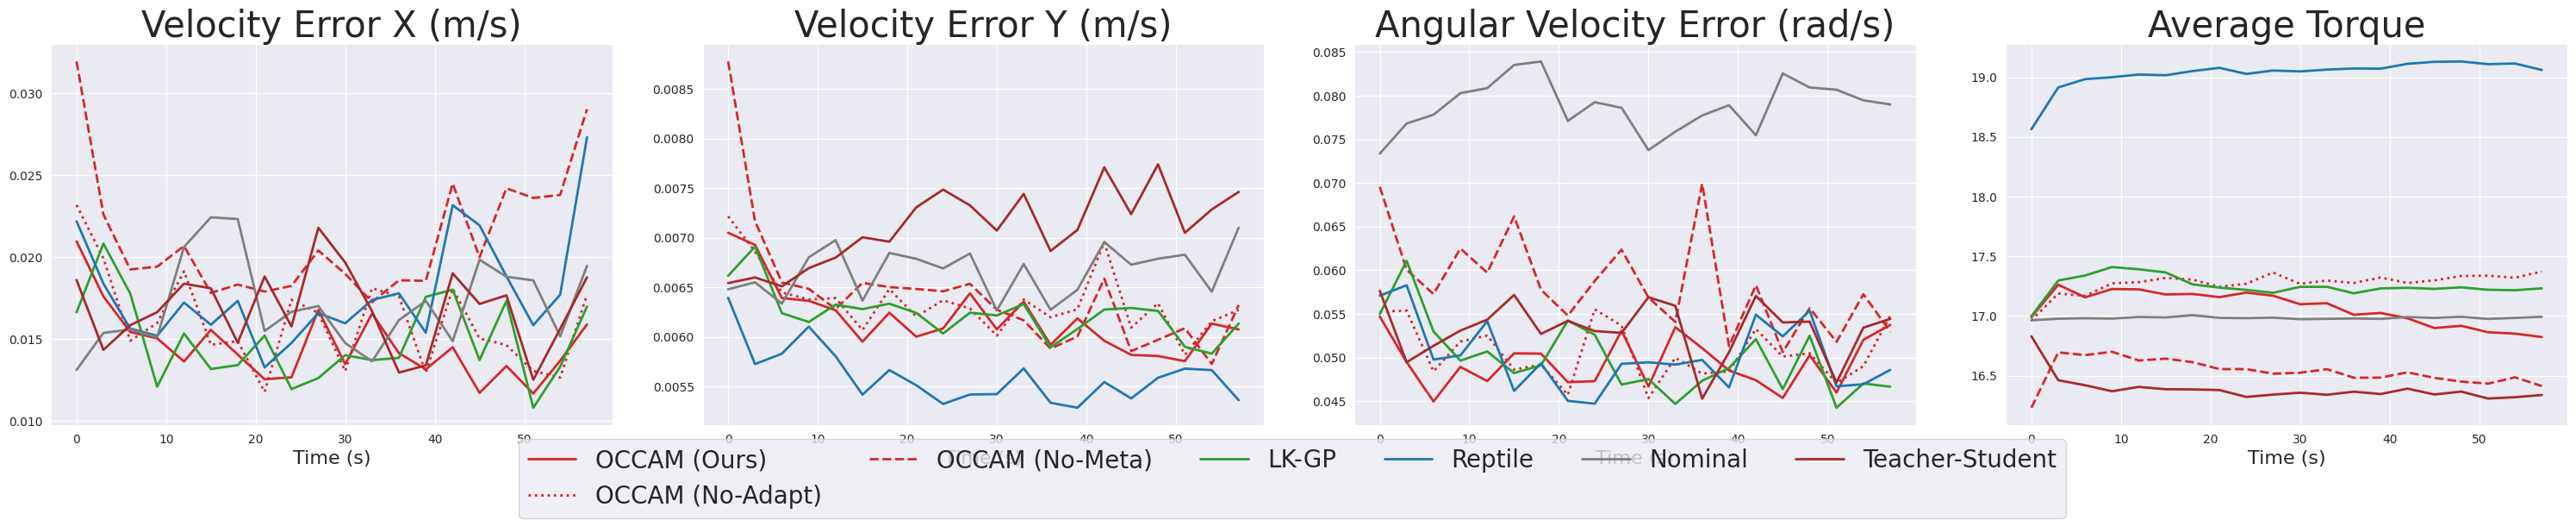

In [69]:
fig, ax = plt.subplots(1, 4, figsize=(30,6))
perf_metric_names = ["Velocity Error X (m/s)", "Velocity Error Y (m/s)", "Angular Velocity Error (rad/s)", "Average Torque"]
for label in labels:
    metrics = uninvert_raw_metrics(all_results[label], "raw_metrics", [0, 1, 2, 3], 2)
    mean = get_mean_filter_crashed_runs([metrics], "raw_metrics", 3)["raw_metrics"]
    print(label, mean[-1])
    for i in range(4):
        ax[i].plot([i*3 for i in range(20)], mean[:,i], c=colors[label], linewidth=2, linestyle=styles[label], label=label)

for i in range(4):
    ax[i].set_title(perf_metric_names[i], fontsize=30)
    ax[i].set_xlabel("Time (s)", fontsize=16)

# ax[0].legend(labels)
# ax[0].set_ylabel("Tracking Error (m)", fontsize=16)

fig.tight_layout()
fig.subplots_adjust(bottom=0.17)
lines_labels = [ax[0].get_legend_handles_labels()]
lines, lbls = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, lbls, ncol=6, loc="lower center", fontsize=20, bbox_to_anchor=(0.5, -0.02))
# plt.savefig("paper_figures/quadruped_ood_1_metrics.png")

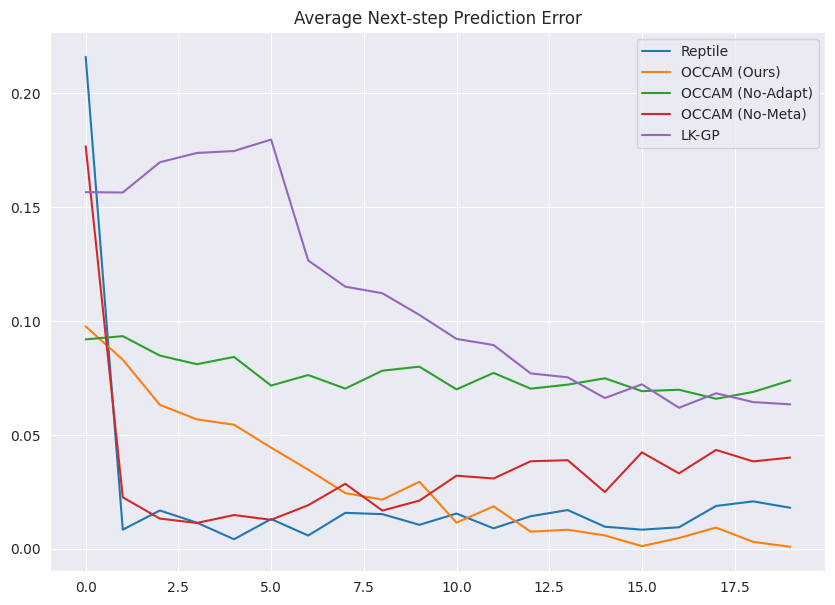

In [29]:
keys = ["expected_costs", "actual_costs"]
labels_exp = ["Reptile", "OCCAM (Ours)", "OCCAM (No-Adapt)", "OCCAM (No-Meta)", "LK-GP"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Next-step Prediction Error")

keys = ["actual_costs", "expected_costs"]
for label in labels_exp:
    mean_results, var_results, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    mean_exp_costs = mean_results["expected_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()    
    line = ax.plot(np.abs(mean_actual_costs - mean_exp_costs))

ax.legend(labels_exp)

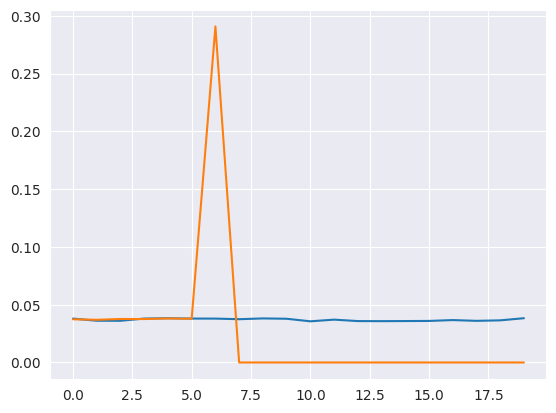

In [136]:
track = 4
param = 1
seed = 6

plt.plot(all_results["OCCAM (Ours)"][seed]["raw_metrics"][track,param,:,-1])
plt.plot(all_results["Nominal"][seed]["raw_metrics"][track,param,:,-1])

In [ ]:
reptile_gain_changes = []
kf_gain_changes = []
for j in range(8):
    tmp_rep = []
    tmp_kf = []
    for trial in range(1,20):
        tmp_rep.append(np.mean(np.abs(all_results["Reptile"][j]["tried_gains"][:,:,trial,:] - all_results["Reptile"][j]["tried_gains"][:,:,trial-1,:])))
        tmp_kf.append(np.mean(np.abs(all_results["Ours"][j]["tried_gains"][:,:,trial,:] - all_results["Ours"][j]["tried_gains"][:,:,trial-1,:])))
    reptile_gain_changes.append(tmp_rep)
    kf_gain_changes.append(tmp_kf)
    
plt.plot(np.mean(reptile_gain_changes, axis=0))
plt.plot(np.mean(kf_gain_changes, axis=0))

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
params_array, tasks, robot_kwargs = load_test_set("mob_loco", "ood_params_3")
# masses = (params_array[:,0]+1)/4
p = params_array[:,0]


all_weights = []
for i in range(8):
    all_weights.append(all_results["Ours"][i]["all_weights"][0,...])
all_weights = np.array(all_weights)

weights_flattened = np.reshape(all_weights, (-1, 15))
dot_colors = np.zeros([*all_weights.shape[:-1]])
for j in range(masses.shape[0]):
    dot_colors[...,j,:] = p[j]
    
dot_colors = dot_colors.flatten()
fig, ax = plt.subplots(figsize=(10,7))
tsne = TSNE(n_components=2)
weights_trans = tsne.fit_transform(weights_flattened)
sns.scatterplot(x=weights_trans[:,0], y=weights_trans[:,1], hue=dot_colors, hue_norm=(min(p), max(p)), ax=ax)
ax.set_title("T-SNE Projection of Obtained Weights for each Quadruped, colored by Added Base Payload")

In [ ]:
print(dot_colors.shape)
print(weights_trans.shape)

# CF ID Params 3

In [155]:
test_set_name = "id_params_3"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
print(model_names)

['nom_gain_adaptive', 'ts_playful-music-498_Apr_08_2024', 'kf_sparkling-sponge-354_Dec_27_2023', 'nom_gain']


In [151]:
# id params 3
idxs = [0, 1, 2, 3]
labels = ["l1-adaptive", "teacher_student", "kf_meta_adapt", "nominal"]
result_idxs = [(0, 5),
              (100, 108),
              (100,108),
              (0,8)]
# id params 1 new
# idxs = [1, 3, 4, 5]
# labels = ["lkbo", "kf_meta_adapt", "nominal", "reptile"]
# result_idxs = [(0,8), (24,32), (0,8), (0,8)]

# id params 1 old
# idxs = [0, 1, 2, 3, 4, 5]
# labels = ["no_adapt", "lkbo", "no_meta", "kf_meta_adapt", "nominal", "reptile"]
# result_idxs = [(16,16+8),
#                (0,8),
#               (0,8),
#               (8,8+8),
#               (0,8),
#               (0,8)]
all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

for label in labels:
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

l1-adaptive failures: 0.0
teacher_student failures: 0.4114583333333333
kf_meta_adapt failures: 0.2630208333333333
nominal failures: 0.013020833333333334


l1-adaptive mttf: 0
teacher_student mttf: 0
kf_meta_adapt mttf: 0
nominal mttf: 0


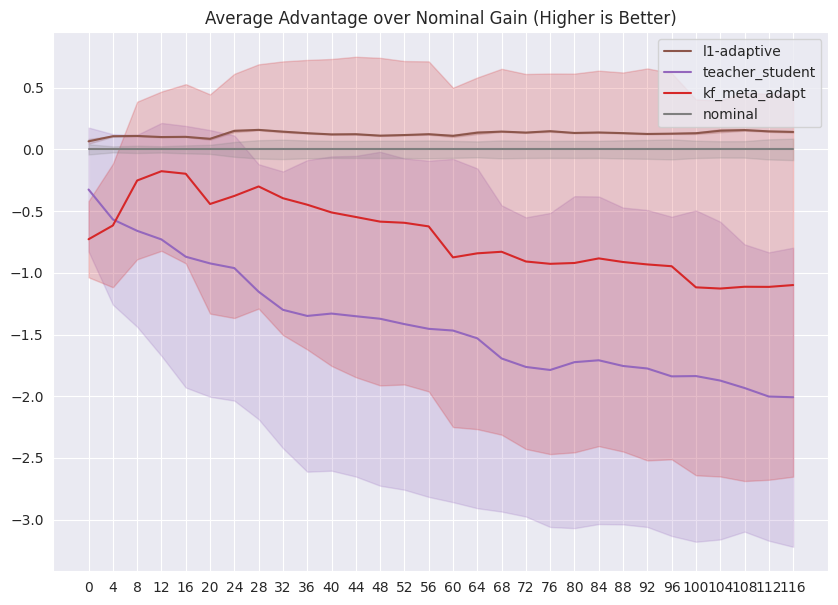

In [152]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Advantage over Nominal Gain (Higher is Better)")

keys = ["actual_costs"]
nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()
x_time = [i*4 for i in range(30)]
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    print(f"{label} mttf: {mttf}")
    line = ax.plot(x_time, mean_actual_costs-nom_ac, c=colors[label])
    ax.fill_between(x_time,
                mean_actual_costs-nom_ac-var_actual_costs, 
                mean_actual_costs-nom_ac+var_actual_costs, color=colors[label], alpha=0.2)
ax.set_xticks(x_time)
ax.legend(labels)
# ax.set_ylim([0.0, 3])

In [ ]:
keys = ["expected_costs", "actual_costs"]
labels_exp = ["reptile", "kf_meta_adapt", "no_adapt", "no_meta", "lkbo"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Next-step Prediction Error")

keys = ["actual_costs", "expected_costs"]
for label in labels_exp:
    mean_results, var_results, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    mean_exp_costs = mean_results["expected_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    
    print(f"{label} mttf: {mttf}")
    line = ax.plot(np.abs(mean_actual_costs - mean_exp_costs))

ax.legend(labels_exp)

In [ ]:
print(all_results["reptile"][-1]["tried_gains"].shape)

In [ ]:
# traj = 2
# param = 14
traj= 0
param=8
plt.plot(all_results["kf_meta_adapt"][0]["full_traj"][traj,param,:,0], all_results["kf_meta_adapt"][0]["full_traj"][traj,param,:,1])
plt.plot(all_results["nominal"][0]["full_traj"][traj,param,:,0], all_results["nominal"][0]["full_traj"][traj,param,:,1])
plt.plot(all_results["reptile"][0]["full_traj"][traj,param,:,0], all_results["reptile"][0]["full_traj"][traj,param,:,1])


(0.35, 0.5)

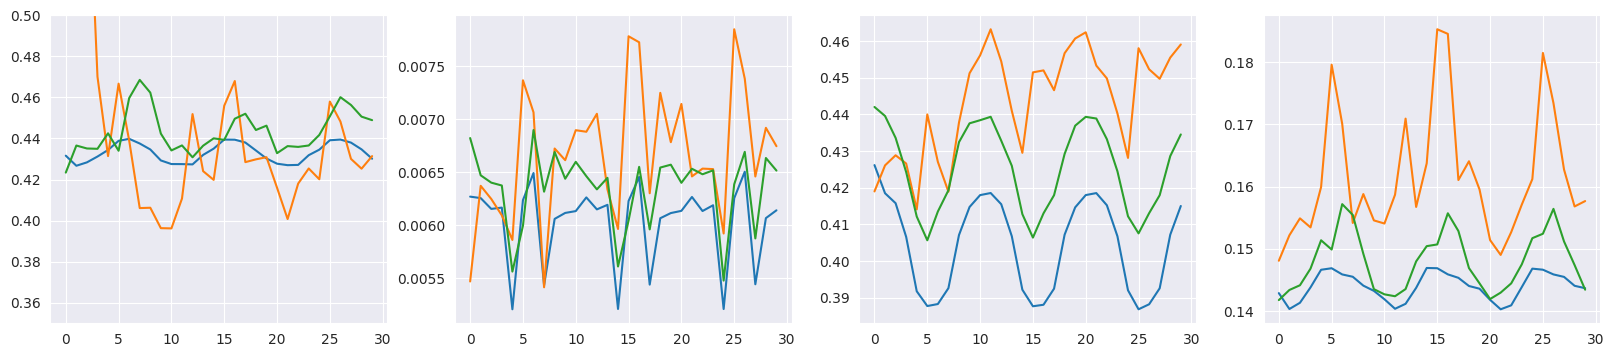

In [85]:
reptile_metrics = []
kf_metrics = []
nom_metrics = []

reptile_metrics = uninvert_raw_metrics(all_results["l1-adaptive"], "raw_metrics", [0,1,2,3], 2)
kf_metrics = uninvert_raw_metrics(all_results["kf_meta_adapt"], "raw_metrics", [0,1,2,3], 2)
nom_metrics = uninvert_raw_metrics(all_results["nominal"], "raw_metrics", [0,1,2,3], 2)

#     reptile_metrics.append(uninvert_raw_metrics(all_results["reptile"], )
#     kf_metrics.append(all_results["kf_meta_adapt"][j]["raw_metrics"])
#     nom_metrics.append(all_results["nominal"][j]["raw_metrics"])
    
# reptile_metrics = np.mean(np.array(reptile_metrics), axis=(0,1,2))
# kf_metrics = np.mean(np.array(kf_metrics), axis=(0,1,2))
# nom_metrics = np.mean(np.array(nom_metrics),axis=(0,1,2))

reptile_metrics = get_mean_filter_crashed_runs([reptile_metrics], "raw_metrics", 3)["raw_metrics"]
kf_metrics = get_mean_filter_crashed_runs([kf_metrics], "raw_metrics", 3)["raw_metrics"]
nom_metrics = get_mean_filter_crashed_runs([nom_metrics], "raw_metrics", 3)["raw_metrics"]

fig, ax = plt.subplots(1,4, figsize=(20,4))
for i in range(4):
    ax[i].plot(reptile_metrics[:,i])
    ax[i].plot(kf_metrics[:,i])
    ax[i].plot(nom_metrics[:,i])

ax[0].set_ylim(0.35, 0.5)

# CF OOD Params 2

In [ ]:
test_set_name = "ood_params_2"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
print(model_names)

In [ ]:
idxs = [0, 1, 2]
labels = ["kf_meta_adapt", "nom_gain", "reptile"]
result_idxs = [(16,16+8),
              (0,8),
              (0,8)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Obtained Reward (Reset-Free)")

keys = ["actual_costs"]
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    print(f"{label} mttf: {mttf}")
    line = ax.plot(mean_actual_costs)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-var_actual_costs, 
#                 mean_actual_costs+var_actual_costs, color=line[0].get_c(), alpha=0.5)
ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels)

In [ ]:
print(kf_mttf, nom_mttf, reptile_mttf)

In [ ]:
plt.plot(np.mean(all_results["reptile"][0]["actual_scaled_metrics"][2,:,:,0], axis=(0)))
plt.plot(np.mean(all_results["kf_meta_adapt"][0]["actual_scaled_metrics"][2,:,:,0], axis=(0)))

# Branin OOD Params 1

In [ ]:
test_set_name = "ood_params_1"
robot_name = "meta_branin"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

In [ ]:
kf_name = model_names[5]
kf_results = []
kf_failures = []
for i in range(5,15):
    results, fails = load_experiment_data(robot_name, kf_name, i, test_set_name)
    kf_results.append(results)
    kf_failures.append(fails)
    
noadapt_name = model_names[1]
noadapt_results = []
noadapt_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, noadapt_name, i, test_set_name)
    noadapt_results.append(results)
    noadapt_failures.append(fails)


reptile_name = model_names[-1]
reptile_results = []
reptile_failures = []
for i in range(10, 20):
    results, fails = load_experiment_data(robot_name, reptile_name, i, test_set_name)
    reptile_results.append(results)
    reptile_failures.append(fails)
    
fpacoh_gain_name = model_names[0]
fpacoh_results = []
fpacoh_failures = []
for i in range(5, 15):
    results, fails = load_experiment_data(robot_name, fpacoh_gain_name, i, test_set_name)
    fpacoh_results.append(results)
    fpacoh_failures.append(fails)
    
nometa_name = model_names[3]
nometa_results = []
nometa_failures = []
for i in range(10):
    results, fails = load_experiment_data(robot_name, nometa_name, i, test_set_name)
    nometa_results.append(results)
    nometa_failures.append(fails)

In [ ]:
keys = ["expected_costs", "actual_costs", "expected_variances"]
mean_kf_results = get_mean_across_multiple_dicts(kf_results, keys)
mean_nometa_results = get_mean_across_multiple_dicts(nometa_results, keys)
mean_reptile_results = get_mean_across_multiple_dicts(reptile_results, ["expected_costs", "actual_costs"])
mean_fpacoh_results = get_mean_across_multiple_dicts(fpacoh_results, ["expected_costs", "actual_costs"])

mean_actual_costs_kf = np.mean(mean_kf_results["actual_costs"], axis=(0)).squeeze()
mean_actual_costs_fpacoh = np.mean(mean_fpacoh_results["actual_costs"], axis=(0)).squeeze()
mean_actual_costs_nometa = np.mean(mean_nometa_results["actual_costs"], axis=(0)).squeeze()

mean_expected_costs_kf = np.mean(mean_kf_results["expected_costs"], axis=(0)).squeeze()
mean_expected_variances_kf = np.mean(mean_kf_results["expected_variances"], axis=(0)).squeeze()
mean_actual_costs_reptile = np.mean(mean_reptile_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_reptile = np.mean(mean_reptile_results["expected_costs"], axis=(0)).squeeze()

var_actual_costs_kf = np.mean(get_vars_across_multiple_dicts(kf_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))
var_actual_costs_nometa = np.mean(get_vars_across_multiple_dicts(nometa_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

var_actual_costs_reptile = np.mean(get_vars_across_multiple_dicts(reptile_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                                   axis=(0))
var_actual_costs_fpacoh = np.mean(get_vars_across_multiple_dicts(fpacoh_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

mean_noadapt_results = get_mean_across_multiple_dicts(noadapt_results, keys)
mean_actual_costs_noadapt = np.mean(mean_noadapt_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_noadapt = np.mean(mean_noadapt_results["expected_costs"], axis=(0)).squeeze()
mean_expected_variances_noadapt = np.mean(mean_noadapt_results["expected_variances"], axis=(0)).squeeze()
var_actual_costs_noadapt = np.mean(get_vars_across_multiple_dicts(noadapt_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

linewidth=2
fig, ax = plt.subplots(figsize=(10, 7))
line_kf = ax.plot(mean_actual_costs_kf, linewidth=linewidth, c=colors["Ours"], linestyle=styles["Ours"])
# ax.fill_between([i for i in range(100)],
#                 mean_actual_costs_kf-var_actual_costs_kf, 
#                 mean_actual_costs_kf+var_actual_costs_kf, color=line_kf[0].get_c(), alpha=0.2)

line_reptile = ax.plot(mean_actual_costs_reptile,linewidth=linewidth, c=colors["Reptile"], linestyle=styles["Reptile"])
# ax.fill_between([i for i in range(100)],
#                 mean_actual_costs_reptile-var_actual_costs_reptile, 
#                 mean_actual_costs_reptile+var_actual_costs_reptile, color=line_reptile[0].get_c(), alpha=0.2)

line_pacoh = ax.plot(mean_actual_costs_fpacoh, linewidth=linewidth, c=colors["F-PACOH"], linestyle=styles["F-PACOH"])
# ax.fill_between([i for i in range(100)],
#                 mean_actual_costs_fpacoh-var_actual_costs_fpacoh, 
#                 mean_actual_costs_fpacoh+var_actual_costs_fpacoh, color=line_pacoh[0].get_c(), alpha=0.2)

line_noadapt = ax.plot(mean_actual_costs_noadapt, linewidth=linewidth, c=colors["Ours (No-Adapt)"], linestyle=styles["Ours (No-Adapt)"])
# ax.fill_between([i for i in range(100)],
#                 mean_actual_costs_noadapt-var_actual_costs_noadapt, 
#                 mean_actual_costs_noadapt+var_actual_costs_noadapt, color=line_noadapt[0].get_c(), alpha=0.2)
line_lkbo = ax.plot(mean_actual_costs_nometa,linewidth=linewidth, c=colors["Ours (No-Meta)"], linestyle=styles["Ours (No-Meta)"])
# ax.fill_between([i for i in range(100)],
#                 mean_actual_costs_nometa-var_actual_costs_nometa, 
#                 mean_actual_costs_nometa+var_actual_costs_nometa, color=line_nometa[0].get_c(), alpha=0.2)
ax.legend(["Ours", "Reptile", "F-PACOH", "Ours (No-Adapt)", "Ours (No-Meta)"], fontsize=14)
ax.set_title("Branin", fontsize=20)
ax.set_ylabel("Average Objective", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
plt.savefig("paper_figures/branin.png")
# ax.set_ylim(-5, 20)

In [ ]:
print(np.mean(mean_actual_costs_kf[-5:]), np.mean(var_actual_costs_kf[-5:]))
print(np.mean(mean_actual_costs_fpacoh[-5:]), np.mean(var_actual_costs_fpacoh[-5:]))
print(np.mean(mean_actual_costs_reptile[-5:]), np.mean(var_actual_costs_reptile[-5:]))
print(np.mean(mean_actual_costs_noadapt[-5:]), np.mean(var_actual_costs_noadapt[-5:]))
print(np.mean(mean_actual_costs_nometa[-5:]), np.mean(var_actual_costs_nometa[-5:]))

# Hartmann OOD Params 1

In [ ]:
test_set_name = "ood_params_1"
robot_name = "meta_hartmann"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

In [ ]:
kf_name = model_names[2]
kf_results = []
kf_failures = []
for i in range(0,10):
    results, fails = load_experiment_data(robot_name, kf_name, i, test_set_name)
    kf_results.append(results)
    kf_failures.append(fails)

nometa_name = model_names[4]
nometa_results = []
nometa_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, nometa_name, i, test_set_name)
    nometa_results.append(results)
    nometa_failures.append(fails)

lkbo_name = model_names[3]
lkbo_results = []
for i in range(0,10):
    results, fails = load_experiment_data(robot_name, lkbo_name, i, test_set_name)
    lkbo_results.append(results)
    
no_adapt = model_names[1]
no_adapt_results = []
no_adapt_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, no_adapt, i, test_set_name)
    no_adapt_results.append(results)
    no_adapt_failures.append(fails)

reptile_name = model_names[5]
reptile_results = []
reptile_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, reptile_name, i, test_set_name)
    reptile_results.append(results)
    reptile_failures.append(fails)
    
fpacoh_gain_name = model_names[0]
fpacoh_results = []
fpacoh_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, fpacoh_gain_name, i, test_set_name)
    fpacoh_results.append(results)
    fpacoh_failures.append(fails)

In [ ]:
keys = ["expected_costs", "actual_costs", "expected_variances"]
mean_kf_results = get_mean_across_multiple_dicts(kf_results, keys)
mean_actual_costs_kf = np.mean(mean_kf_results["actual_costs"], axis=(0)).squeeze()
# mean_expected_costs_kf = np.mean(mean_kf_results["expected_costs"], axis=(0)).squeeze()
# mean_expected_variances_kf = np.mean(mean_kf_results["expected_variances"], axis=(0)).squeeze()
var_actual_costs_kf = np.mean(np.sqrt(get_vars_across_multiple_dicts(kf_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_noadapt_results = get_mean_across_multiple_dicts(no_adapt_results, keys)
mean_actual_costs_noadapt = np.mean(mean_noadapt_results["actual_costs"], axis=(0)).squeeze()
# mean_expected_costs_noadapt = np.mean(mean_noadapt_results["expected_costs"], axis=(0)).squeeze()
# mean_expected_variances_noadapt = np.mean(mean_noadapt_results["expected_variances"], axis=(0)).squeeze()
var_actual_costs_noadapt = np.mean(np.sqrt(get_vars_across_multiple_dicts(no_adapt_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_nometa_results = get_mean_across_multiple_dicts(nometa_results, keys)
mean_actual_costs_nometa = np.mean(mean_nometa_results["actual_costs"], axis=(0)).squeeze()
# mean_expected_costs_nometa = np.mean(mean_nometa_results["expected_costs"], axis=(0)).squeeze()
# mean_expected_variances_nometa = np.mean(mean_nometa_results["expected_variances"], axis=(0)).squeeze()
var_actual_costs_nometa = np.mean(np.sqrt(get_vars_across_multiple_dicts(nometa_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))


mean_reptile_results = get_mean_across_multiple_dicts(reptile_results, ["expected_costs", "actual_costs"])
mean_actual_costs_reptile = np.mean(mean_reptile_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_reptile = np.mean(mean_reptile_results["expected_costs"], axis=(0)).squeeze()
var_actual_costs_reptile = np.mean(np.sqrt(get_vars_across_multiple_dicts(reptile_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                                   axis=(0))

mean_fpacoh_results = get_mean_across_multiple_dicts(fpacoh_results, ["expected_costs", "actual_costs"])
mean_actual_costs_fpacoh = np.mean(mean_fpacoh_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_fpacoh = np.mean(np.sqrt(get_vars_across_multiple_dicts(fpacoh_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_lkbo_results = get_mean_across_multiple_dicts(lkbo_results, ["expected_costs", "actual_costs"])
mean_actual_costs_lkbo = np.mean(mean_lkbo_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_lkbo = np.mean(np.sqrt(get_vars_across_multiple_dicts(lkbo_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))



num_trials = 40
fig, ax = plt.subplots(figsize=(10, 7))
line_kf = ax.plot(mean_actual_costs_kf, linewidth=2, c=colors["Ours"], linestyle=styles["Ours"])
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_kf-var_actual_costs_kf, 
#                 mean_actual_costs_kf+var_actual_costs_kf, color=line_kf[0].get_c(), alpha=0.5)

# line_lkbo = ax.plot(mean_actual_costs_lkbo)
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_lkbo-var_actual_costs_lkbo, 
#                 mean_actual_costs_lkbo+var_actual_costs_lkbo, color=line_lkbo[0].get_c(), alpha=0.5)

line_reptile = ax.plot(mean_actual_costs_reptile, linewidth=2, c=colors["Reptile"], linestyle=styles["Reptile"])
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_reptile-var_actual_costs_reptile, 
#                 mean_actual_costs_reptile+var_actual_costs_reptile, color=line_reptile[0].get_c(), alpha=0.5)

line_pacoh = ax.plot(mean_actual_costs_fpacoh, linewidth=2, c=colors["F-PACOH"], linestyle=styles["F-PACOH"])
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_fpacoh-var_actual_costs_fpacoh, 
#                 mean_actual_costs_fpacoh+var_actual_costs_fpacoh, color=line_pacoh[0].get_c(), alpha=0.5)

line_noadapt = ax.plot(mean_actual_costs_noadapt, linewidth=2, c=colors["Ours (No-Adapt)"], linestyle=styles["Ours (No-Adapt)"])
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_noadapt-var_actual_costs_noadapt, 
#                 mean_actual_costs_noadapt+var_actual_costs_noadapt, color=line_noadapt[0].get_c(), alpha=0.5)

line_nometa = ax.plot(mean_actual_costs_nometa, linewidth=2, c=colors["Ours (No-Meta)"], linestyle=styles["Ours (No-Meta)"])
# ax.fill_between([i for i in range(num_trials)],
#                 mean_actual_costs_nometa-var_actual_costs_nometa, 
#                 mean_actual_costs_nometa+var_actual_costs_nometa, color=line_nometa[0].get_c(), alpha=0.5)


# ax.legend(["Ours", "Reptile", "F-PACOH", "Ours (No-Adapt)", "Ours (No-Meta)"], fontsize=14)
ax.set_title("Hartmann", fontsize=20)
ax.set_ylabel("Average Objective", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
plt.savefig("paper_figures/hartmann.png")


In [ ]:
print("{:e}".format(np.mean(mean_actual_costs_kf[-5:])), "{:e}".format(np.mean(var_actual_costs_kf[-5:])))
print("{:e}".format(np.mean(mean_actual_costs_fpacoh[-5:])), "{:e}".format(np.mean(var_actual_costs_fpacoh[-5:])))
print("{:e}".format(np.mean(mean_actual_costs_reptile[-5:])), "{:e}".format(np.mean(var_actual_costs_reptile[-5:])))
print("{:e}".format(np.mean(mean_actual_costs_noadapt[-5:])), "{:e}".format(np.mean(var_actual_costs_noadapt[-5:])))
print("{:e}".format(np.mean(mean_actual_costs_nometa[-5:])), "{:e}".format(np.mean(var_actual_costs_nometa[-5:])))

# TDC Swept Friction

In [ ]:
test_set_name = "swept_friction"
robot_name = "topdowncar"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
print(model_names)

In [ ]:
idxs = [0, 1, 2]
labels = ["reptile", "nom_gain", "kf_meta_adapt"]
result_idxs = [(0,8),
               (0,8),
              (8,16)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas
total_num = len(all_results[labels[0]]) * all_results[labels[0]][0]["actual_costs"].shape[0] * all_results[labels[0]][0]["actual_costs"].shape[1]
print(total_num)

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")
    
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Obtained Reward (Reset-Free)")

keys = ["actual_costs"]

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["nom_gain"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()

for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    print(f"{label} mttf: {mttf}")
    line = ax.plot(mean_actual_costs)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-var_actual_costs, 
#                 mean_actual_costs+var_actual_costs, color=line[0].get_c(), alpha=0.5)
ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels)

In [ ]:
# Analyze the effect of varying the friction parameter on the tried gains
num_tracks = 3
num_params = 8
avg_gain = np.zeros((num_params, 6))
for p_idx in range(num_params):
    mean_last_gain = []
    for i in range(len(all_results["kf_meta_adapt"])):
        mean_last_gain.append(np.mean(all_results["kf_meta_adapt"][i]["tried_gains"][:,p_idx,-3:], axis=(0,1)))
    avg_gain[p_idx] = np.mean(np.array(mean_last_gain), axis=0)

In [ ]:
fig, ax = plt.subplots(2,2, sharex=True)
ax = ax.flatten()
titles = ["Steering Gain", "Acceleration Gain", "Braking Gain", "Braking Threshold"]
frictions = np.array([200, 210, 240, 300, 400, 460, 480, 500])
idxs = [0, 2, 3, 5]
for i in range(4):
    ax[i].plot(frictions, avg_gain[:,idxs[i]], linewidth=2)
    ax[i].set_title(titles[i])
text = fig.text(0.5, -0.01, "Friction (unitless environment parameter)", ha="center", fontsize=16)
fig.tight_layout()
# fig.savefig("paper_figures/friction_gains.png", bbox_extra_artists=(text,), bbox_inches='tight')

In [ ]:
num_tracks = 3
num_params = 8
avg_gain = np.zeros((num_params,30))
g_idx = 3
for p_idx in range(num_params):
    mean_gain = []
    for i in range(len(all_results["kf_meta_adapt"])):
        mean_gain.append(np.mean(all_results["kf_meta_adapt"][i]["tried_gains"][:,p_idx,:,g_idx], axis=(0)))
    avg_gain[p_idx] = np.mean(np.array(mean_gain), axis=0)
    
fig = plt.figure()
ax = plt.gca()
for i in range(num_params):
    ax.plot(avg_gain[i,:])
    ax.set_ylim(0.0, 1.0)
ax.legend([i for i in range(num_params)])

In [ ]:
# plot weight T-SNE embeddings for each parameter set
from sklearn.manifold import TSNE
import seaborn as sns
all_weights = []
for i in range(8):
    all_weights.append(all_results["kf_meta_adapt"][i]["all_weights"][0,...])
all_weights = np.array(all_weights)
num_trials = 30
frictions = np.array([200, 210, 240, 300, 400, 460, 480, 500])

weights_flattened = np.reshape(all_weights, (-1, 5))
friction_colors = np.zeros([*all_weights.shape[:-1]])
for j in range(frictions.shape[0]):
    friction_colors[...,j,:] = frictions[j]
    
friction_colors = friction_colors.flatten()
    
which_trial = np.array([[i for i in range(num_trials)] for f in frictions]).flatten()
fig, ax = plt.subplots(figsize=(10,7))
tsne = TSNE(n_components=2)
weights_trans = tsne.fit_transform(weights_flattened)
sns.scatterplot(x=weights_trans[:,0], y=weights_trans[:,1], hue=friction_colors, ax=ax)
ax.set_title("T-SNE Projection of Obtained Weights for each Car, colored by friction")

# TDC ID Tasks 1

In [82]:
test_set_name = "id_tasks_1"
robot_name = "topdowncar"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

0 kf_noadapt_woven-water-348_Dec_26_2023
1 reptile_hardy-sound-351_Dec_27_2023
2 lkbo
3 ts_azure-glade-490_Apr_07_2024
4 nom_gain
5 kf_woven-water-348_Dec_26_2023


no_adapt failures: 0.022916666666666665
kf_meta_adapt failures: 0.04375
nominal failures: 0.0
lkbo failures: 0.0020833333333333333
reptile failures: 0.027083333333333334


<IPython.core.display.Javascript object>


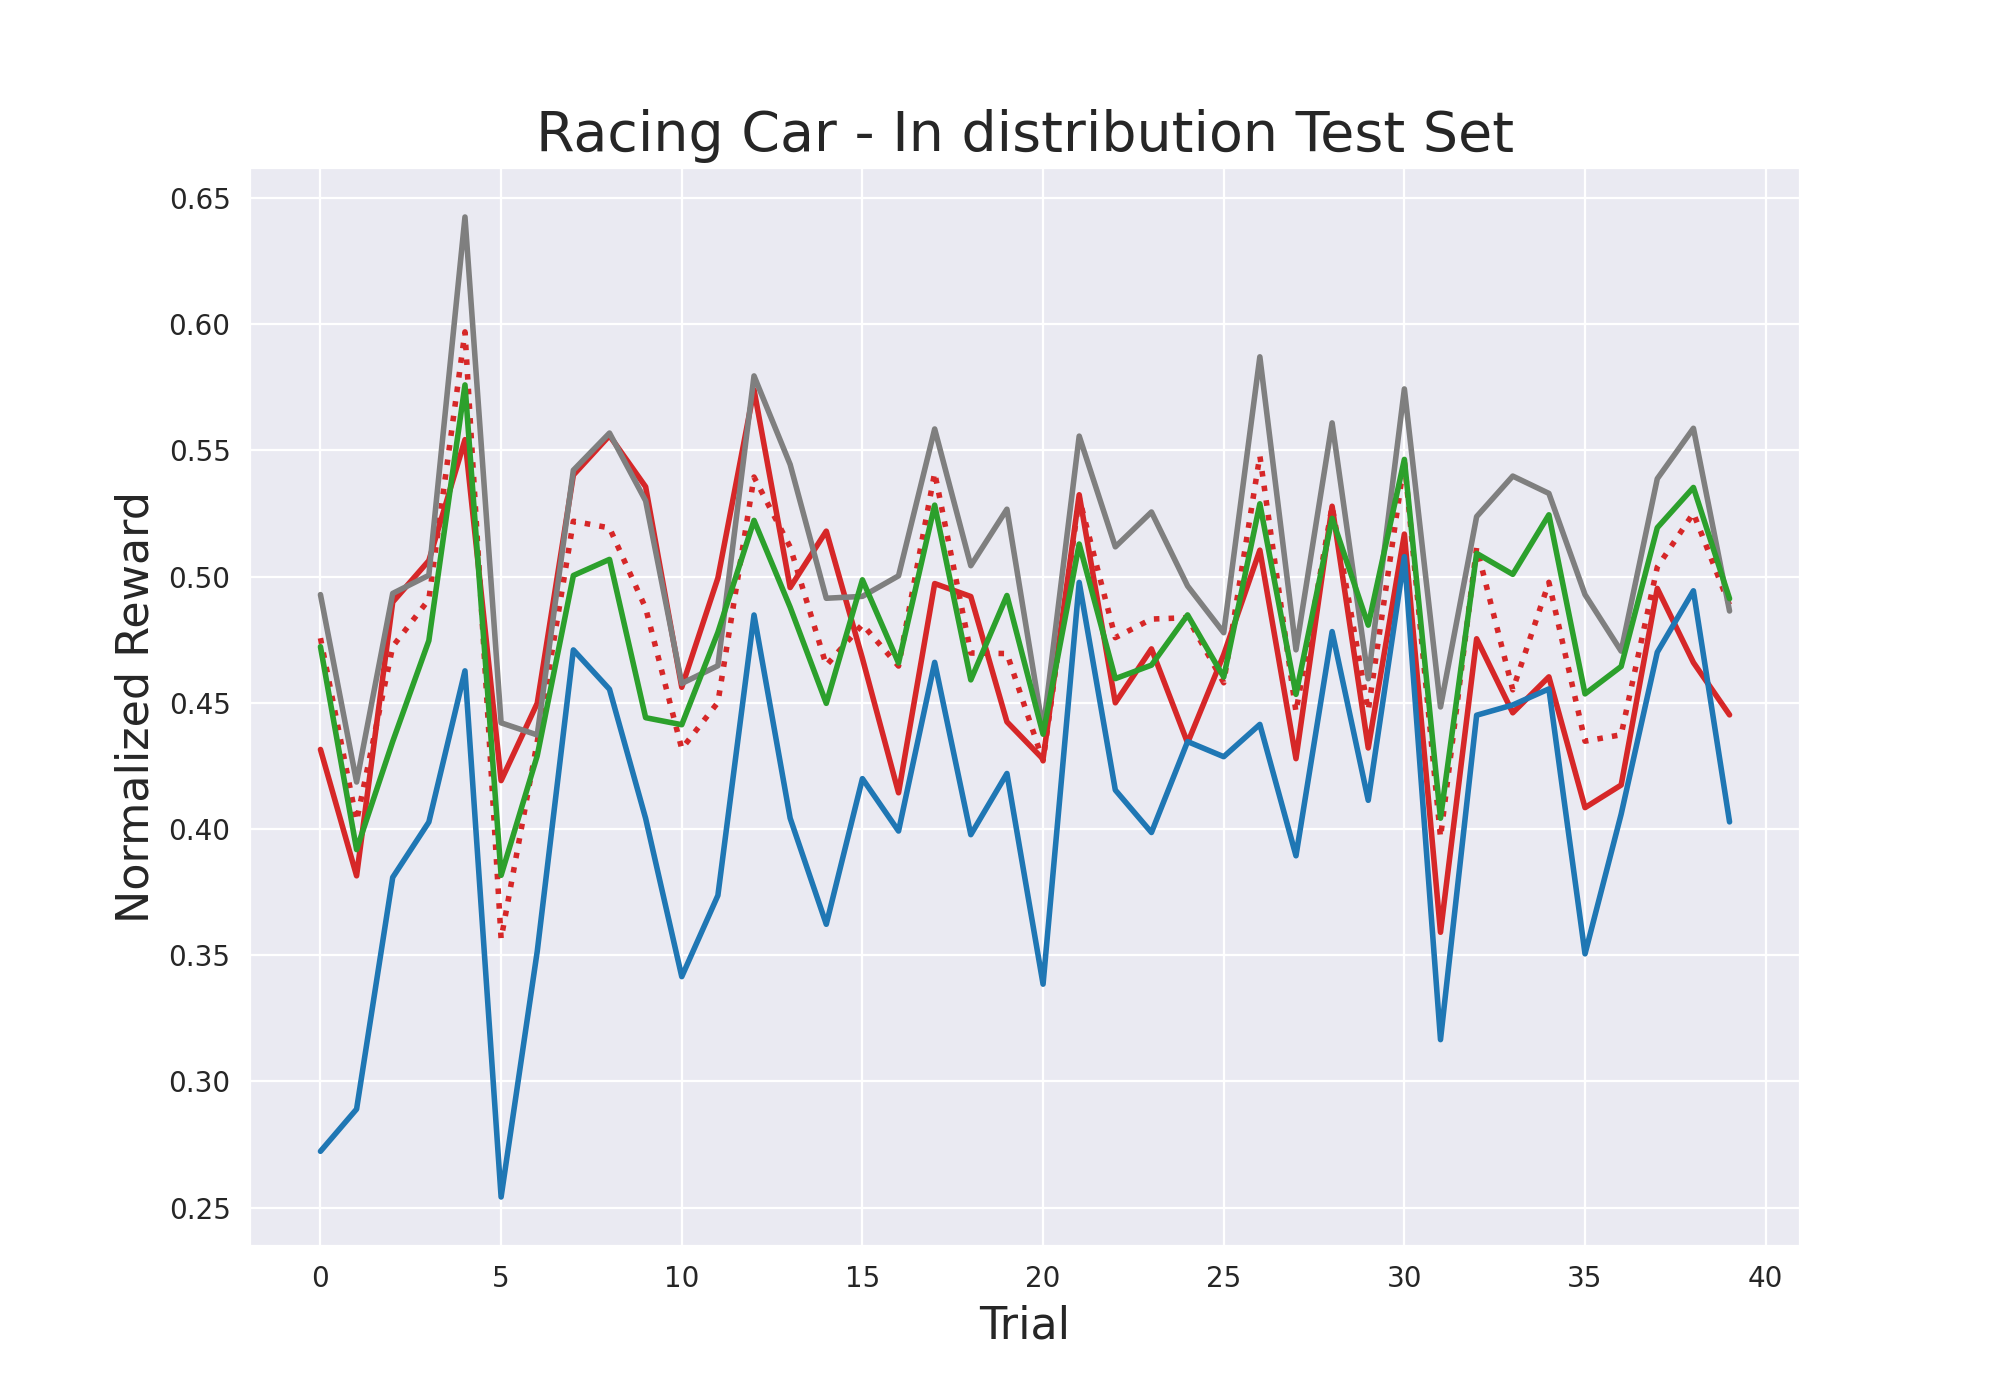

In [84]:
idxs = [0, 5, 4, 2, 1]
labels = ["no_adapt", "kf_meta_adapt", "nominal", "lkbo", "reptile"]
result_idxs = [(2005, 2010),
              (1000, 1005),
              (100,105),
              (100,105),
              (100,105)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas
total_num = len(all_results[labels[0]]) * all_results[labels[0]][0]["actual_costs"].shape[0] * all_results[labels[0]][0]["actual_costs"].shape[1]

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Racing Car - In distribution Test Set", fontsize=20)
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
keys = ["actual_costs"]

# nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["nominal"], keys, 2)
# nom_ac = nom_results["actual_costs"].squeeze()

for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
#     line = ax.plot(mean_actual_costs-nom_ac)
    line = sns.lineplot(mean_actual_costs, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_ac-var_actual_costs, 
#                 mean_actual_costs-nom_ac+var_actual_costs, color=line[0].get_c(), alpha=0.5)
    
# ax.set_xticks([i for i in range(len(mean_actual_costs))])


In [85]:
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    tmp1, tmp2, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    print("------")
    print(f"{label} final mean: {np.mean(mean_actual_costs[-5:])}")
    print(f"{label} final std: {np.mean(var_actual_costs[-5:])}")
    print(f"{label} mttf: {mttf}")
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

------
no_adapt final mean: 0.477913792936702
no_adapt final std: 0.06543871867275224
no_adapt mttf: 22.434150772025433
no_adapt failures: 0.022916666666666665
------
kf_meta_adapt final mean: 0.44645248673474036
kf_meta_adapt final std: 0.19746976435302005
kf_meta_adapt mttf: 21.6563541170871
kf_meta_adapt failures: 0.04375
------
nominal final mean: 0.5094206188560073
nominal final std: 5.551115123125783e-18
nominal mttf: 0.0
nominal failures: 0.0
------
lkbo final mean: 0.4927439350048754
lkbo final std: 0.0813749214345218
lkbo mttf: 5.9405940594059405
lkbo failures: 0.0020833333333333333
------
reptile final mean: 0.42470663050413526
reptile final std: 0.13343564531088387
reptile mttf: 17.217524980784013
reptile failures: 0.027083333333333334


# CF ID

In [156]:
test_set_name = "id_wind"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

0 nom_gain_adaptive
1 ts_playful-music-498_Apr_08_2024
2 kf_sparkling-sponge-354_Dec_27_2023
3 nom_gain
4 reptile_devout-puddle-384_Jan_06_2024


In [157]:
# idxs = [0, 1, 2]
idxs = [2, 3, 4, 0]
labels = ["kf_meta_adapt", "nominal", "reptile", "l1-adaptive"]
result_idxs = [(8,16),
              (0,8),
              (0,8),
              (100,108)]

kf_meta_adapt failures: 0.21212121212121213
nominal failures: 0.0
reptile failures: 0.7007575757575758
l1-adaptive failures: 0.0


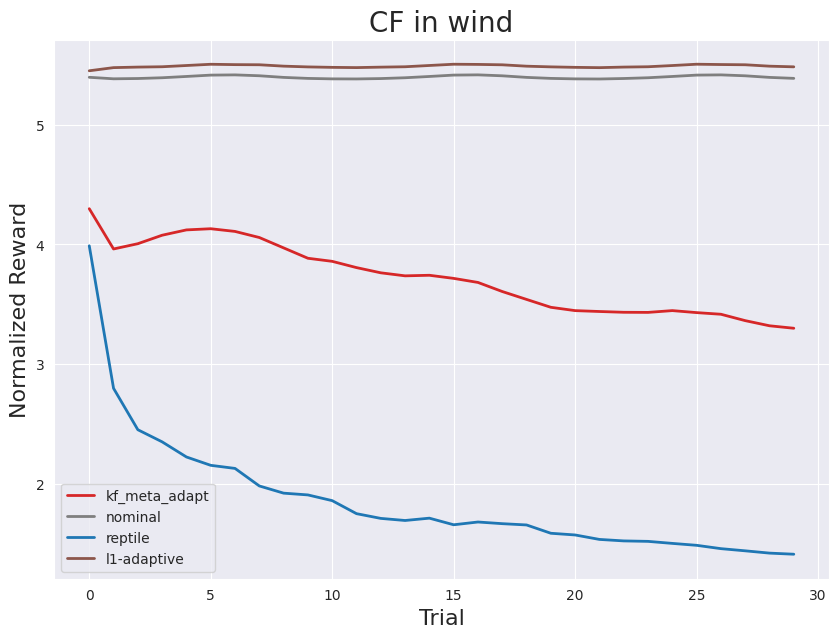

In [158]:
all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas
total_num = len(all_results[labels[0]]) * all_results[labels[0]][0]["actual_costs"].shape[0] * all_results[labels[0]][0]["actual_costs"].shape[1]

for label in labels:
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("CF in wind", fontsize=20)
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
keys = ["actual_costs"]

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()

for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
#     line = ax.plot(mean_actual_costs-nom_ac)
    line = sns.lineplot(mean_actual_costs, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_ac-var_actual_costs, 
#                 mean_actual_costs-nom_ac+var_actual_costs, color=line[0].get_c(), alpha=0.5)
    
# ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels)

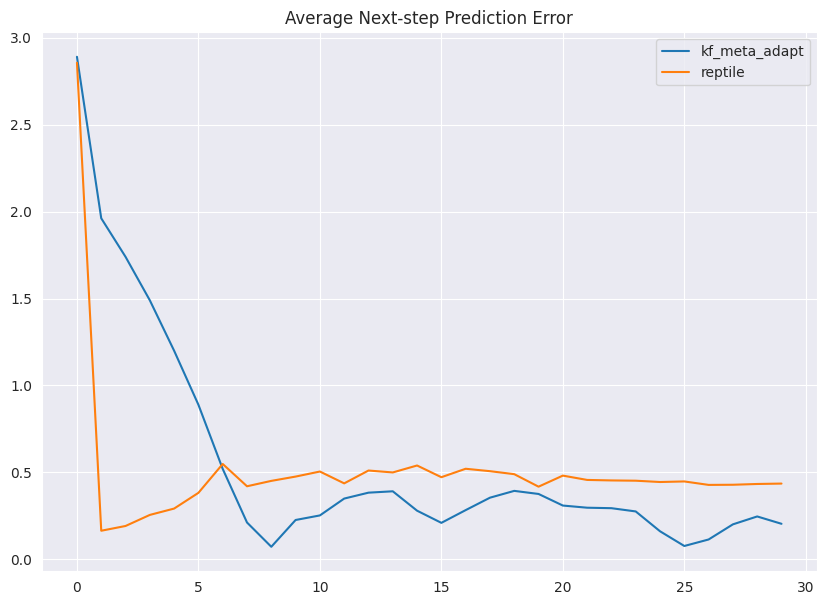

In [160]:
keys = ["actual_costs", "expected_scaled_metrics", "actual_scaled_metrics"]
# labels_exp = ["reptile", "kf_meta_adapt", "no_adapt", "no_meta", "teacher_student"]
labels_exp = ["kf_meta_adapt", "reptile"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Average Next-step Prediction Error")

for label in labels_exp:
    mean_results = get_mean_filter_launch_fails(all_results[label], keys, 2)
#     mean_actual_costs = mean_results["actual_costs"].squeeze()
#     mean_exp_costs = mean_results["expected_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     line = ax.plot(np.abs(mean_actual_costs - mean_exp_costs))

    mean_expected_scaled_metrics = mean_results["expected_scaled_metrics"].squeeze()[...,0]
    mean_actual_scaled_metrics = mean_results["actual_scaled_metrics"].squeeze()[...,0]
    line = ax.plot(np.abs(mean_expected_scaled_metrics - mean_actual_scaled_metrics))

ax.legend(labels_exp)

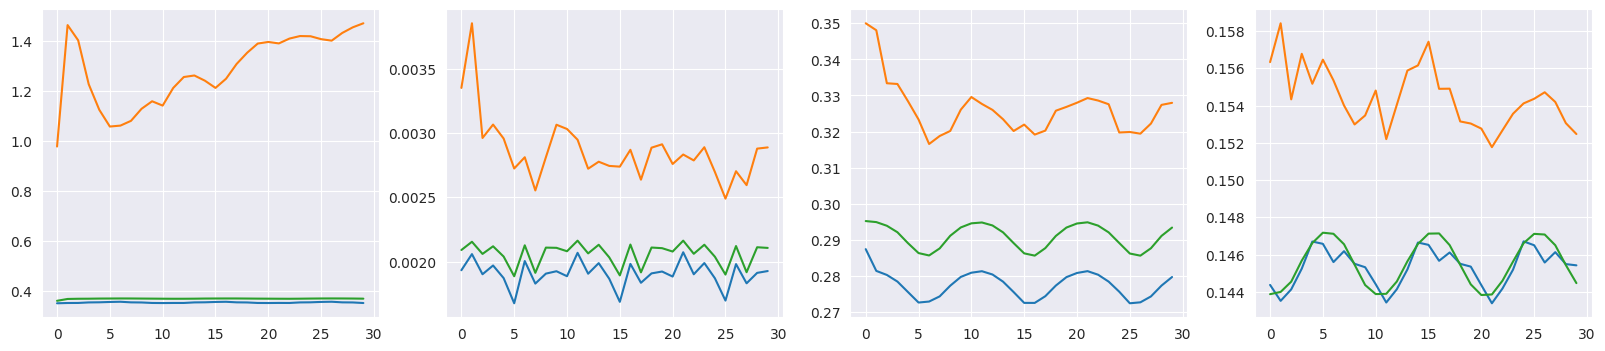

In [162]:
reptile_metrics = []
kf_metrics = []
nom_metrics = []

reptile_metrics = uninvert_raw_metrics(all_results["l1-adaptive"], "raw_metrics", [0,1,2,3], 2)
kf_metrics = uninvert_raw_metrics(all_results["kf_meta_adapt"], "raw_metrics", [0,1,2,3], 2)
nom_metrics = uninvert_raw_metrics(all_results["nominal"], "raw_metrics", [0,1,2,3], 2)

#     reptile_metrics.append(uninvert_raw_metrics(all_results["reptile"], )
#     kf_metrics.append(all_results["kf_meta_adapt"][j]["raw_metrics"])
#     nom_metrics.append(all_results["nominal"][j]["raw_metrics"])
    
# reptile_metrics = np.mean(np.array(reptile_metrics), axis=(0,1,2))
# kf_metrics = np.mean(np.array(kf_metrics), axis=(0,1,2))
# nom_metrics = np.mean(np.array(nom_metrics),axis=(0,1,2))

reptile_metrics = get_mean_filter_crashed_runs([reptile_metrics], "raw_metrics", 3)["raw_metrics"]
kf_metrics = get_mean_filter_crashed_runs([kf_metrics], "raw_metrics", 3)["raw_metrics"]
nom_metrics = get_mean_filter_crashed_runs([nom_metrics], "raw_metrics", 3)["raw_metrics"]

fig, ax = plt.subplots(1,4, figsize=(20,4))
for i in range(4):
    ax[i].plot(reptile_metrics[:,i])
    ax[i].plot(kf_metrics[:,i])
    ax[i].plot(nom_metrics[:,i])

# ax[0].set_ylim(0.35, 0.5)

In [26]:
t_idx = 0
p_idx = 5
print(all_results["kf_meta_adapt"][0]["tried_gains"][t_idx,p_idx,-1])

[0.05016467 0.88840699 0.19726038 0.55244964 0.80559242 0.27441248
 0.00914478 0.99535757]


# CF ID Params 1

In [36]:
test_set_name = "id_params_1"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)

0 kf_noadapt_sparkling-sponge-354_Dec_27_2023
1 nom_gain_adaptive
2 ts_playful-music-498_Apr_08_2024
3 lkbo
4 kf_nometa_sparkling-sponge-354_Dec_27_2023
5 kf_sparkling-sponge-354_Dec_27_2023
6 nom_gain
7 reptile_devout-puddle-384_Jan_06_2024


In [40]:
idxs = [5, 6, 7, 3, 1, 0, 2]
# labels = ["kf_meta_adapt", "nominal", "reptile","lkbo", "l1-adaptive", "no_adapt", "teacher_student"]
labels = ["OCCAM (Ours)", "Nominal", "Reptile", "LK-GP", "L1-Adaptive", "OCCAM (No-Adapt)", "Teacher-Student"]
result_idxs = [(24,24+8),
              (0,8),
              (0,8),
              (0,8),
              (10,15),
              (1000, 1005),
              (0,5)]

OCCAM (Ours) failures: 0.375
Nominal failures: 0.4791666666666667
Reptile failures: 0.375
LK-GP failures: 0.3776041666666667
L1-Adaptive failures: 0.575
OCCAM (No-Adapt) failures: 0.325
Teacher-Student failures: 0.6416666666666667


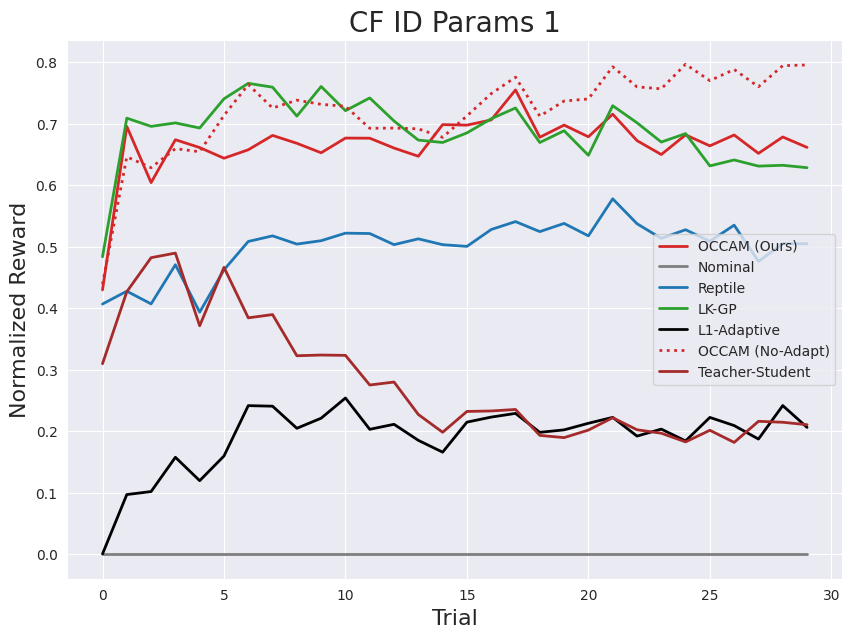

In [41]:
all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

for label in labels:
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("CF ID Params 1", fontsize=20)
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
keys = ["actual_costs"]

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()

for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
#     line = ax.plot(mean_actual_costs-nom_ac)
    line = sns.lineplot(mean_actual_costs-nom_ac, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_ac-var_actual_costs, 
#                 mean_actual_costs-nom_ac+var_actual_costs, color=line[0].get_c(), alpha=0.5)
    
# ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels)

In [74]:
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    tmp1, tmp2, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    print("------")
    print(f"{label} final mean: {np.mean(mean_actual_costs[-5:])}")
    print(f"{label} final std: {np.mean(var_actual_costs[-5:])}")
    print(f"{label} mttf: {mttf}")
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

------
kf_meta_adapt final mean: 1.8270098672703157
kf_meta_adapt final std: 0.40468479294856446
kf_meta_adapt mttf: 7.770293729602112
kf_meta_adapt failures: 0.375
------
nominal final mean: 1.1594014026958273
nominal final std: 0.13956308800721176
nominal mttf: 5.581218412042824
nominal failures: 0.4791666666666667
------
reptile final mean: 1.6654786070720256
reptile final std: 0.41214952035699975
reptile mttf: 5.99958336226651
reptile failures: 0.375
------
lkbo final mean: 1.7924175245883318
lkbo final std: 0.38777961078097967
lkbo mttf: 8.013240466174747
lkbo failures: 0.3776041666666667
------
l1-adaptive final mean: 1.3728165691372562
l1-adaptive final std: 0.5549971541677842
l1-adaptive mttf: 4.818491413665677
l1-adaptive failures: 0.575
------
no_adapt final mean: 1.9412186496301698
no_adapt final std: 0.2622273359071903
no_adapt mttf: 4.935264709652608
no_adapt failures: 0.325


OCCAM (Ours) 0.4885392258404454
Nominal 0.6108790308814196
Reptile 0.5174928465875498
LK-GP 0.4860714908768064
L1-Adaptive 0.46206164966282526
OCCAM (No-Adapt) 0.49990255286418417
Teacher-Student 0.38509537654178283


Text(0.5, 0, 'Time (s)')

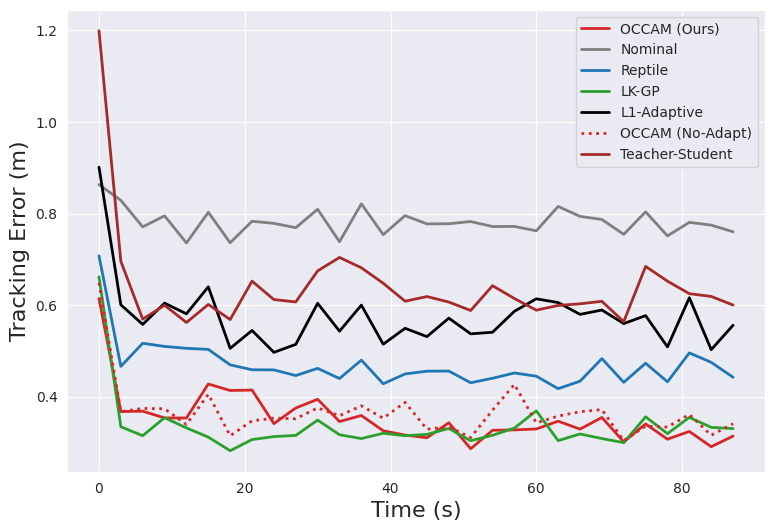

In [42]:
fix, ax = plt.subplots(figsize=(9,6))
for label in labels:
    metrics = uninvert_raw_metrics(all_results[label], "raw_metrics", [0, 1, 2, 3], 2)
    mean = get_mean_filter_crashed_runs([metrics], "raw_metrics", 3)["raw_metrics"]
    print(label, np.mean(mean[-5:-1]))
    ax.plot([i*3 for i in range(30)], mean[:,0], c=colors[label], linewidth=2, linestyle=styles[label])
        
ax.legend(labels)
ax.set_ylabel("Tracking Error (m)", fontsize=16)
ax.set_xlabel("Time (s)", fontsize=16)


# CF ID Wind 4

In [43]:
test_set_name = "id_wind_4"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)
    
# colors = {"OCCAM (No-Adapt)": "C3",
#          "OCCAM (No-Meta)": "C3",
#           "OCCAM (Ours)": "C3",
#          "Reptile": "C0",
#          "LK-GP": "C2",
#          "Nominal": "C7",
#          "F-PACOH": "C2",
#          "L1-Adaptive":"Black"}
# styles = {"OCCAM (No-Adapt)":"dotted",
#          "OCCAM (No-Meta)": "dashed",
#          "OCCAM (Ours)": "solid",
#          "LK-GP": "solid",
#          "Nominal":"solid",
#          "F-PACOH": "solid",
#          "Reptile": "solid",
#          "L1-Adaptive": "solid"}


0 kf_noadapt_sparkling-sponge-354_Dec_27_2023
1 nom_gain_adaptive
2 kf_sparkling-sponge-354_Dec_27_2023
3 nom_gain
4 reptile_devout-puddle-384_Jan_06_2024


OCCAM (Ours) failures: 0.0
Nominal failures: 0.0
L1-Adaptive failures: 0.0
Reptile failures: 0.0
OCCAM (No-Adapt) failures: 0.0


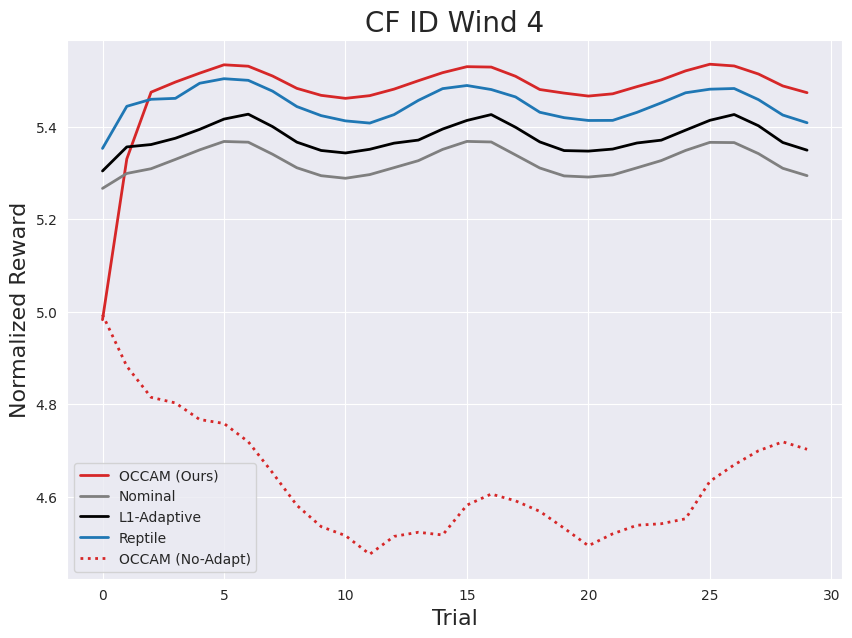

In [51]:
idxs = [2, 3, 1, 4, 0]
labels = ["OCCAM (Ours)", "Nominal", "L1-Adaptive", "Reptile", "OCCAM (No-Adapt)"]
result_idxs = [(0,5),
              (100,103),
              (3,6),
              (0,3),
              (0,3)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

for label in labels:
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("CF ID Wind 4", fontsize=20)
ax.set_ylabel("Normalized Reward", fontsize=16)
ax.set_xlabel("Trial", fontsize=16)
keys = ["actual_costs"]

# nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["nominal"], keys, 2)
# nom_ac = nom_results["actual_costs"].squeeze()

for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
#     var_actual_costs = var_results["actual_costs"].squeeze()
#     print(f"{label} mttf: {mttf}")
#     line = ax.plot(mean_actual_costs-nom_ac)
    line = sns.lineplot(mean_actual_costs, ax=ax, c=colors[label], linestyle=styles[label], linewidth=2)
#     ax.fill_between([i for i in range(len(mean_actual_costs))],
#                 mean_actual_costs-nom_ac-var_actual_costs, 
#                 mean_actual_costs-nom_ac+var_actual_costs, color=line[0].get_c(), alpha=0.5)
    
# ax.set_xticks([i for i in range(len(mean_actual_costs))])
ax.legend(labels)

OCCAM (Ours) [0.06820586 0.0036122  0.38525783 0.26632839]
Nominal [0.11794503 0.00344416 0.37888609 0.26557216]
L1-Adaptive [0.09687892 0.00373928 0.38704887 0.27271573]
Reptile [0.07444262 0.00410597 0.40122947 0.26854436]
OCCAM (No-Adapt) [0.30622293 0.00336277 0.38554614 0.26715149]


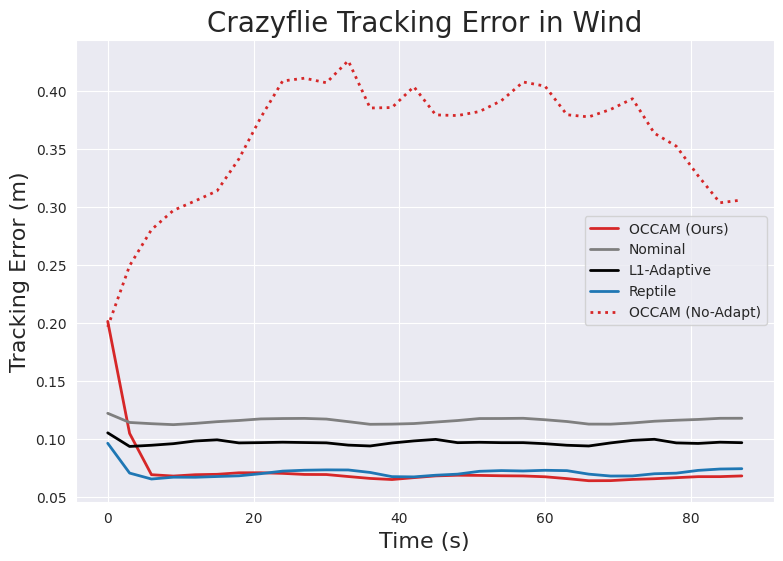

In [61]:
# fig, ax = plt.subplots(1,4, figsize=(20,4))

fix, ax = plt.subplots(figsize=(9,6))
for label in labels:
    metrics = uninvert_raw_metrics(all_results[label], "raw_metrics", [0, 1, 2, 3], 2)
    mean = get_mean_filter_crashed_runs([metrics], "raw_metrics", 3)["raw_metrics"]
    print(label, mean[-1])
    ax.plot([i*3 for i in range(30)], mean[:,0], c=colors[label], linewidth=2, linestyle=styles[label])
        
ax.legend(labels)
ax.set_ylabel("Tracking Error (m)", fontsize=16)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_title("Crazyflie Tracking Error in Wind", fontsize=20)
plt.savefig("paper_figures/crazyflie_wind.png")

# Mob ID Params 1

In [44]:
test_set_name = "id_params_1"
robot_name = "mob_loco"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
for i, name in enumerate(model_names):
    print(i, name)


0 reptile_drawn-dew-410_Jan_25_2024
1 lkbo
2 kf_noadapt_lemon-dragon-409_Jan_25_2024
3 nom_gain
4 kf_lemon-dragon-409_Jan_25_2024


OCCAM (Ours) failures: 0.0875
Nominal failures: 0.14791666666666667
Reptile failures: 0.09375
OCCAM (No-Adapt) failures: 0.05625
LK-GP failures: 0.08333333333333333


<IPython.core.display.Javascript object>


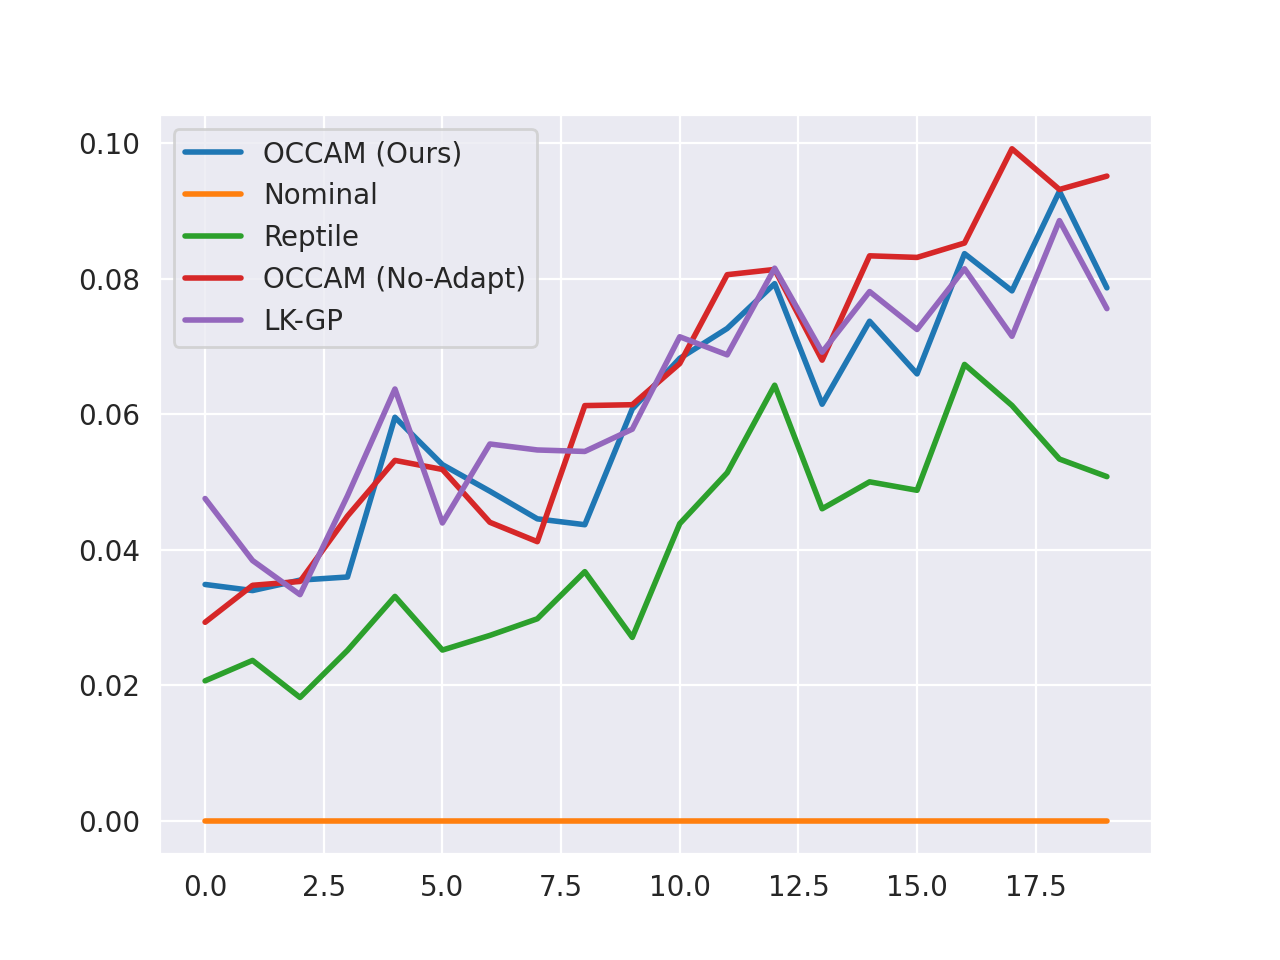

In [79]:
idxs = [4, 3, 0, 2, 1]
labels = ["OCCAM (Ours)", "Nominal", "Reptile", "OCCAM (No-Adapt)", "LK-GP"]
result_idxs = [(0,4),
              (0,4),
              (0,4),
              (4,8),
              (0,4)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()

for label in labels:
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")


keys = ["actual_costs"]
fig, ax = plt.subplots()
for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    line = sns.lineplot(mean_actual_costs-nom_ac, ax=ax, linewidth=2, label=label)


In [80]:
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
#     mean_results = get_mean_filter_crashed_runs(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    tmp1, tmp2, mttf = get_mean_std_filter_all_fails(all_results[label], keys, 2)
    print("------")
    print(f"{label} final mean: {np.mean(mean_actual_costs[-5:])}")
    print(f"{label} final std: {np.mean(var_actual_costs[-5:])}")
    print(f"{label} mttf: {mttf}")
    total_num = len(all_results[label]) * all_results[label][0]["actual_costs"].shape[0] * all_results[label][0]["actual_costs"].shape[1]
    failed = sum_multiple_dicts(all_failures[label], "failed_count")
    print(f"{label} failures: {failed['failed_count']/total_num}")

------
OCCAM (Ours) final mean: 0.7441926213956884
OCCAM (Ours) final std: 0.09539662103947447
OCCAM (Ours) mttf: 7.926684122827899
OCCAM (Ours) failures: 0.0875
------
Nominal final mean: 0.6642962177184513
Nominal final std: 0.09677993093569903
Nominal mttf: 8.365019011406844
Nominal failures: 0.14791666666666667
------
Reptile final mean: 0.7206254492063939
Reptile final std: 0.1027710748070769
Reptile mttf: 9.264607864918908
Reptile failures: 0.09375
------
OCCAM (No-Adapt) final mean: 0.7554902659878285
OCCAM (No-Adapt) final std: 0.07762297058144715
OCCAM (No-Adapt) mttf: 6.664198445020363
OCCAM (No-Adapt) failures: 0.05625
------
LK-GP final mean: 0.7422367979200181
LK-GP final std: 0.08254657967024762
LK-GP mttf: 9.47263184203949
LK-GP failures: 0.08333333333333333
